In [816]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup
import pprint
import re
import urllib.request
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm  
from sklearn import metrics
import warnings
import time
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 500)

In [817]:
url = "https://www.sportskeeda.com/kabaddi/past-seasons-pro-kabaddi-points-table"
headers = {"User-Agent":"Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_5) AppleWebKit 537.36 (KHTML, like Gecko) Chrome",
           "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8"}
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text,'html.parser')

In [818]:
links = soup.find_all("table")
len(links)

8

In [819]:
links

[<table><tbody><tr><td class="ql-align-center" data-row="1"><strong>Rank</strong></td><td class="ql-align-center" data-row="1"><strong>Team</strong></td><td class="ql-align-center" data-row="1"><strong>Played</strong></td><td class="ql-align-center" data-row="1"><strong>Won</strong></td><td class="ql-align-center" data-row="1"><strong>Lost</strong></td><td class="ql-align-center" data-row="1"><strong>Tie</strong></td><td class="ql-align-center" data-row="1"><strong>Score Difference</strong></td><td class="ql-align-center" data-row="1"><strong>Points</strong></td></tr><tr><td class="ql-align-center" data-row="2">1</td><td class="ql-align-center" data-row="2"><a href="https://www.sportskeeda.com/team/gujarat-fortune-giants" style="color: rgb(17, 85, 204);" target="_blank">Gujarat Fortune Giants (Q)</a></td><td class="ql-align-center" data-row="2">22</td><td class="ql-align-center" data-row="2">17</td><td class="ql-align-center" data-row="2">3</td><td class="ql-align-center" data-row="2">

In [820]:
type(links[0].find_all('strong'))

bs4.element.ResultSet

In [821]:
col = []
for x in links[0].find_all('strong'):
    col.append(x.text)

In [822]:
col.remove('Score Difference')
col

['Rank', 'Team', 'Played', 'Won', 'Lost', 'Tie', 'Points']

In [823]:
lstDF = []
for link in links:
    l = []
    rows= link.find_all('tr')
    for tr in range(1,len(rows)):
        td = rows[tr].find_all('td')
        row = [rows[tr].text for rows[tr] in td]
        l.append(row)
    lstDF.append(pd.DataFrame(l))

In [824]:
for i in range(2,len(lstDF)):
    lstDF[i].insert(0,'Rank', range(1, len(lstDF[i]) + 1))
for i in range(2,len(lstDF)):
    if(i!=4):
        lstDF[i] = lstDF[i].drop([5], axis=1)
lstDF[0] = lstDF[0].drop([6], axis=1)
lstDF[1] = lstDF[1].drop([6], axis=1)

In [825]:
for i in range(0,len(lstDF)):
    lstDF[i].columns = col

In [826]:
for i in range(0,len(lstDF)):
    print(lstDF[i])

  Rank                        Team Played Won Lost Tie Points
0    1  Gujarat Fortune Giants (Q)     22  17    3   2     93
1    2                 U Mumba (Q)     22  15    5   2     86
2    3       Dabang Delhi K.C. (Q)     22  11    9   2     68
3    4               Puneri Paltan     22   8   12   2     52
4    5        Jaipur Pink Panthers     22   6   13   3     43
5    6            Haryana Steelers     22   6   14   2     42
  Rank                 Team Played Won Lost Tie Points
0    1  Bengaluru Bulls (Q)     22  13    7   2     78
1    2  Bengal Warriors (Q)     22  12    8   2     69
2    3      U.P. Yoddha (Q)     22   8   10   4     57
3    4        Patna Pirates     22   9   11   2     55
4    5        Telugu Titans     22   8   13   1     51
5    6      Tamil Thalaivas     22   5   13   4     42
   Rank                    Team Played Won Lost Tie Points
0     1  Gujarat Fortune Giants     22  15    4   3     87
1     2           Puneri Paltan     22  15    7   0     80
2   

In [827]:
url2 = "https://www.sportskeeda.com/kabaddi/pro-kabaddi-points-table"
response2 = requests.get(url2, headers=headers)
soup2 = BeautifulSoup(response2.text,'html.parser')

In [828]:
table = soup2.find_all("table")[0]

In [829]:
l = []
rows= table.find_all('tr')
for tr in range(1,len(rows)):
    time.sleep(10)
    td = rows[tr].find_all('td')
    row = [rows[tr].text for rows[tr] in td]
    l.append(row)
lstDF.append(pd.DataFrame(l))

In [830]:
lstDF[8] = lstDF[8].drop([6], axis=1)

In [831]:
lstDF[8].columns =col

In [832]:
lstDF[8]

,Rank,Team,Played,Won,Lost,Tie,Points
0,1,Dabang Delhi K.C.,20,15,3,2,82
1,2,Bengal Warriors,20,13,4,3,78
2,3,Haryana Steelers,19,12,6,1,65
3,4,Bengaluru Bulls,19,10,8,1,58
4,5,U.P. Yoddha,18,10,6,2,58
5,6,U Mumba,18,9,8,1,54
6,7,Jaipur Pink Panthers,20,8,10,2,52
7,8,Gujarat Fortune Giants,20,6,12,2,45
8,9,Puneri Paltan,20,6,11,3,42
9,10,Patna Pirates,19,6,12,1,40


In [833]:
for i in lstDF:
    i.Team = i.Team.apply(lambda x: (x.split('(')[0]).rstrip())

In [834]:
teams = []
for i in lstDF:
    teams = teams + list(i.Team)
set(teams)

{'Bengal Warriors',
 'Bengaluru Bulls',
 'Dabang Delhi',
 'Dabang Delhi K.C.',
 'Dabang Delhi KC',
 'Gujarat Fortune Giants',
 'Haryana Steelers',
 'Jaipur Pink Panthers',
 'Patna Pirates',
 'Puneri Paltan',
 'Tamil Thalaivas',
 'Telugu Titans',
 'U Mumba',
 'U.P. Yoddha',
 'UP Yoddha'}

In [835]:
for i in lstDF:
    i.Team = i.Team.replace({'Dabang Delhi K.C.': 'Dabang Delhi', 'Dabang Delhi KC': 'Dabang Delhi', 'U.P. Yoddha': 'UP Yoddha'}).fillna(i.Team)

In [836]:
lstDF

[  Rank                    Team Played Won Lost Tie Points
 0    1  Gujarat Fortune Giants     22  17    3   2     93
 1    2                 U Mumba     22  15    5   2     86
 2    3            Dabang Delhi     22  11    9   2     68
 3    4           Puneri Paltan     22   8   12   2     52
 4    5    Jaipur Pink Panthers     22   6   13   3     43
 5    6        Haryana Steelers     22   6   14   2     42,
   Rank             Team Played Won Lost Tie Points
 0    1  Bengaluru Bulls     22  13    7   2     78
 1    2  Bengal Warriors     22  12    8   2     69
 2    3        UP Yoddha     22   8   10   4     57
 3    4    Patna Pirates     22   9   11   2     55
 4    5    Telugu Titans     22   8   13   1     51
 5    6  Tamil Thalaivas     22   5   13   4     42,
    Rank                    Team Played Won Lost Tie Points
 0     1  Gujarat Fortune Giants     22  15    4   3     87
 1     2           Puneri Paltan     22  15    7   0     80
 2     3        Haryana Steelers     22  

In [837]:
teams = []
for i in lstDF:
    teams = teams + list(i.Team)
set(teams)

{'Bengal Warriors',
 'Bengaluru Bulls',
 'Dabang Delhi',
 'Gujarat Fortune Giants',
 'Haryana Steelers',
 'Jaipur Pink Panthers',
 'Patna Pirates',
 'Puneri Paltan',
 'Tamil Thalaivas',
 'Telugu Titans',
 'U Mumba',
 'UP Yoddha'}

In [838]:
lstDF[0] = pd.concat([lstDF[0], lstDF[1]]).sort_values(by=['Points'], ascending=False).reset_index().drop('index',axis=1)
lstDF[0].Rank = range(1, len(lstDF[0]) + 1)
lstDF[2] = pd.concat([lstDF[2], lstDF[3]]).sort_values(by=['Points'], ascending=False).reset_index().drop('index',axis=1)
lstDF[2].Rank = range(1, len(lstDF[2]) + 1)

In [839]:
del lstDF[1]
del lstDF[2]

In [840]:
lstDF

[    Rank                    Team Played Won Lost Tie Points
 0      1  Gujarat Fortune Giants     22  17    3   2     93
 1      2                 U Mumba     22  15    5   2     86
 2      3         Bengaluru Bulls     22  13    7   2     78
 3      4         Bengal Warriors     22  12    8   2     69
 4      5            Dabang Delhi     22  11    9   2     68
 5      6               UP Yoddha     22   8   10   4     57
 6      7           Patna Pirates     22   9   11   2     55
 7      8           Puneri Paltan     22   8   12   2     52
 8      9           Telugu Titans     22   8   13   1     51
 9     10    Jaipur Pink Panthers     22   6   13   3     43
 10    11        Haryana Steelers     22   6   14   2     42
 11    12         Tamil Thalaivas     22   5   13   4     42,
     Rank                    Team Played Won Lost Tie Points
 0      1  Gujarat Fortune Giants     22  15    4   3     87
 1      2           Puneri Paltan     22  15    7   0     80
 2      3        Haryan

In [841]:
Years = [2018,2017,2016,2016,2015,2014, 2019]
Season = [6,5,4,3,2,1,7]

In [842]:
for i in range(0,len(lstDF)):
    lstDF[i]['Year'] = Years[i]
    lstDF[i]['Season'] = Season[i]

In [843]:
lstDF

[    Rank                    Team Played Won Lost Tie Points  Year  Season
 0      1  Gujarat Fortune Giants     22  17    3   2     93  2018       6
 1      2                 U Mumba     22  15    5   2     86  2018       6
 2      3         Bengaluru Bulls     22  13    7   2     78  2018       6
 3      4         Bengal Warriors     22  12    8   2     69  2018       6
 4      5            Dabang Delhi     22  11    9   2     68  2018       6
 5      6               UP Yoddha     22   8   10   4     57  2018       6
 6      7           Patna Pirates     22   9   11   2     55  2018       6
 7      8           Puneri Paltan     22   8   12   2     52  2018       6
 8      9           Telugu Titans     22   8   13   1     51  2018       6
 9     10    Jaipur Pink Panthers     22   6   13   3     43  2018       6
 10    11        Haryana Steelers     22   6   14   2     42  2018       6
 11    12         Tamil Thalaivas     22   5   13   4     42  2018       6,
     Rank               

In [844]:
df= pd.concat(lstDF)

In [845]:
df.head()

,Rank,Team,Played,Won,Lost,Tie,Points,Year,Season
0,1,Gujarat Fortune Giants,22,17,3,2,93,2018,6
1,2,U Mumba,22,15,5,2,86,2018,6
2,3,Bengaluru Bulls,22,13,7,2,78,2018,6
3,4,Bengal Warriors,22,12,8,2,69,2018,6
4,5,Dabang Delhi,22,11,9,2,68,2018,6


In [846]:
from selenium import webdriver as driver

In [847]:
u = "https://www.prokabaddi.com/stats/49-96-total-points-scored-statistics"
headers = {"User-Agent":"Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_5) AppleWebKit 537.36 (KHTML, like Gecko) Chrome",
           "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8"}
res = requests.get(u,headers=headers)
s = BeautifulSoup(res.text,'html.parser')
wd = driver.Chrome()

In [848]:
import time
time.sleep(10)
wd.get(u)
time.sleep(10)

In [849]:
lst_standings = wd.find_elements_by_xpath("//select[@id='si_dropdown']/option")
lst_seasons = wd.find_elements_by_xpath("//select[@id='season_dropdown']/option")

In [850]:
print(list(lst_standing.text for lst_standing in lst_standings))
print(list(lst_season.text for lst_season in lst_seasons))

['TOTAL POINTS SCORED', 'TOTAL POINTS CONCEDED', 'AVG POINTS SCORED', 'SUCCESSFUL RAIDS', 'RAID POINTS', 'AVG RAID POINTS', 'SUCCESSFUL TACKLES', 'TACKLE POINTS', 'AVG TACKLE POINTS', 'SUPER RAID', 'SUPER TACKLES', 'DO-OR-DIE RAID POINTS', 'ALL-OUTS INFLICTED', 'ALL-OUTS CONCEDED']
['ALL SEASONS', 'SEASON 7', 'SEASON 6', 'SEASON 5', 'SEASON 4', 'SEASON 3', 'SEASON 2', 'SEASON 1']


In [851]:
lst_standings = lst_standings[3:]

In [852]:
print(list(lst_standing.text for lst_standing in lst_standings))
print(list(lst_season.text for lst_season in lst_seasons))

['SUCCESSFUL RAIDS', 'RAID POINTS', 'AVG RAID POINTS', 'SUCCESSFUL TACKLES', 'TACKLE POINTS', 'AVG TACKLE POINTS', 'SUPER RAID', 'SUPER TACKLES', 'DO-OR-DIE RAID POINTS', 'ALL-OUTS INFLICTED', 'ALL-OUTS CONCEDED']
['ALL SEASONS', 'SEASON 7', 'SEASON 6', 'SEASON 5', 'SEASON 4', 'SEASON 3', 'SEASON 2', 'SEASON 1']


In [853]:

def get_data(season, attribute):
    season.click()
    attribute.click()
    time.sleep(10)
    if(season in ['ALL SEASONS', 'SEASON 7', 'SEASON 6', 'SEASON 5']):
        wd.execute_script("arguments[0].scrollIntoView()", wd.find_element_by_xpath("//div[@id='load_more']"))
        wd.execute_script("window.scrollTo(0, window.scrollY - 200)")
        wd.find_element_by_xpath("//div[@id='load_more']").click()
    text = wd.find_element_by_xpath("//div[@class='si-leadBoard-detail-wrap si-stats-partial-data']").text
    lst_text = text.split("\n")
    dct = {}
    lst1 = []
    lst2 = []
    lst3 = []
    lst4 = []

    count=1
    for idx in range(4,len(lst_text)):
        if count == 3:
            lst11 = lst_text[idx].split(" ")
            lst3.append(lst11[0])
            lst4.append(lst11[1])
            count = 1
        elif count == 2:
            lst2.append(lst_text[idx])
            count += 1
        else:
            lst1.append(lst_text[idx].strip("."))
            count += 1
    dct[lst_text[0]] = lst1
    dct[lst_text[1]] = lst2
    dct[lst_text[2]] = lst3
    dct[lst_text[3]] = lst4
    df = pd.DataFrame.from_dict(dct)
    return df

In [854]:
dctDFTeam = {}
for i in lst_seasons:
    for j in lst_standings:
        #get_data(i,j).to_csv(i.text + '_' + j.text + '.csv')
        dctDFTeam[i.text + '_' + j.text] = get_data(i,j)
        #print(dctDFTeam[i.text + '_' + j.text])

In [855]:
u = "https://www.prokabaddi.com/stats/0-102-total-points-statistics"
headers = {"User-Agent":"Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_5) AppleWebKit 537.36 (KHTML, like Gecko) Chrome",
           "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8"}
res = requests.get(u,headers=headers)
s = BeautifulSoup(res.text,'html.parser')
# wd = wd.Chrome()
#wd = wd.Chrome()
time.sleep(10)

In [856]:
wd.get(u)
time.sleep(10)

In [857]:
lst_standings = wd.find_elements_by_xpath("//select[@id='si_dropdown']/option")
lst_seasons = wd.find_elements_by_xpath("//select[@id='season_dropdown']/option")

In [858]:
print(list(lst_standing.text for lst_standing in lst_standings))
print(list(lst_season.text for lst_season in lst_seasons))

['TOTAL POINTS', 'SUCCESSFUL RAIDS', 'RAID POINTS', 'SUCCESSFUL TACKLES', 'TACKLE POINTS', 'AVG RAID POINTS', 'AVG TACKLE POINTS', 'DO-OR-DIE RAID POINTS', 'SUPER RAIDS', 'SUPER TACKLES', 'SUPER 10S', 'HIGH 5S']
['ALL SEASONS', 'SEASON 7', 'SEASON 6', 'SEASON 5', 'SEASON 4', 'SEASON 3', 'SEASON 2', 'SEASON 1']


In [859]:
lst_standings = [lst_standing for lst_standing in lst_standings if lst_standing.text in               
['SUCCESSFUL RAIDS', 'RAID POINTS', 'SUCCESSFUL TACKLES', 'TACKLE POINTS', 'AVG RAID POINTS', 'AVG TACKLE POINTS']]

In [860]:
print(list(lst_standing.text for lst_standing in lst_standings))
print(list(lst_season.text for lst_season in lst_seasons))

['SUCCESSFUL RAIDS', 'RAID POINTS', 'SUCCESSFUL TACKLES', 'TACKLE POINTS', 'AVG RAID POINTS', 'AVG TACKLE POINTS']
['ALL SEASONS', 'SEASON 7', 'SEASON 6', 'SEASON 5', 'SEASON 4', 'SEASON 3', 'SEASON 2', 'SEASON 1']


In [861]:
import time
def get_data_players(season, attribute):
    season.click()
    attribute.click()
    time.sleep(10)
    while(wd.find_element_by_xpath("//div[@id='load_more']").is_displayed()):
            wd.execute_script("arguments[0].scrollIntoView()", wd.find_element_by_xpath("//div[@id='load_more']"))
            wd.execute_script("window.scrollTo(0, window.scrollY - 200)")
            wd.find_element_by_xpath("//div[@id='load_more']").click()
    text = wd.find_element_by_xpath("//div[@class='si-leadBoard-detail-wrap si-stats-partial-data']").text
    
    lst6 = []
    lst_teams = wd.find_elements_by_xpath("//a[@class='sipk-lb-detailBlock sipk-lb-team']")
    #print(len(lst_teams))
    for idx in lst_teams:
        lst6.append(idx.get_attribute('href').split('teams/')[1].split('-profile')[0].replace('-',' ').title())
                                    
    lst_text = text.split("\n")
    dict_player = {}
    lst1 = []
    lst2 = []
    lst3 = []
    lst4 = []
    lst5 = []
    
    count=1
    for idx in range(5,len(lst_text)):
        if count == 4:
            lst11 = lst_text[idx].split(" ")
            lst4.append(lst11[0])
            lst5.append(lst11[1])
            count = 1
        elif count == 3:
            lst3.append(lst_text[idx])
            count += 1
        elif count == 2:
            if(lst_text[idx] == 'Vijendar Singh' or lst_text[idx] == 'Gurchet Singh'):
                lst3.append("NaN")
                count = 4
            else:
                count += 1
            lst2.append(lst_text[idx])
        else:
            lst1.append(lst_text[idx].strip("."))
            count += 1

    dict_player[lst_text[0]] = lst1
    dict_player[lst_text[1]] = lst2
    dict_player["Position"] = lst3
    dict_player[lst_text[3]] = lst4
    dict_player[lst_text[4]] = lst5
    dict_player[lst_text[2]] = lst6
    df = pd.DataFrame.from_dict(dict_player)
    return df

In [862]:
dctDFPlayer = {}
lst_standings
for i in lst_seasons:
    for j in lst_standings:
        #get_data(i,j).to_csv(i.text + '_' + j.text + '.csv')
#         print(i,j)
        dctDFPlayer[i.text + '_' + j.text] = get_data_players(i,j)
        #print(dctDFPlayer[i.text + '_' + j.text])

In [863]:
wd.quit()

In [864]:
lstDF

[    Rank                    Team Played Won Lost Tie Points  Year  Season
 0      1  Gujarat Fortune Giants     22  17    3   2     93  2018       6
 1      2                 U Mumba     22  15    5   2     86  2018       6
 2      3         Bengaluru Bulls     22  13    7   2     78  2018       6
 3      4         Bengal Warriors     22  12    8   2     69  2018       6
 4      5            Dabang Delhi     22  11    9   2     68  2018       6
 5      6               UP Yoddha     22   8   10   4     57  2018       6
 6      7           Patna Pirates     22   9   11   2     55  2018       6
 7      8           Puneri Paltan     22   8   12   2     52  2018       6
 8      9           Telugu Titans     22   8   13   1     51  2018       6
 9     10    Jaipur Pink Panthers     22   6   13   3     43  2018       6
 10    11        Haryana Steelers     22   6   14   2     42  2018       6
 11    12         Tamil Thalaivas     22   5   13   4     42  2018       6,
     Rank               

In [865]:
df= pd.concat(lstDF[:-1])
df.Played = pd.to_numeric(df.Played)
df.Rank = pd.to_numeric(df.Rank)
df.Won = pd.to_numeric(df.Won)
df.Lost = pd.to_numeric(df.Lost)
df.Tie = pd.to_numeric(df.Tie)
df.Points = pd.to_numeric(df.Points)
df

,Rank,Team,Played,Won,Lost,Tie,Points,Year,Season
0,1,Gujarat Fortune Giants,22,17,3,2,93,2018,6
1,2,U Mumba,22,15,5,2,86,2018,6
2,3,Bengaluru Bulls,22,13,7,2,78,2018,6
3,4,Bengal Warriors,22,12,8,2,69,2018,6
4,5,Dabang Delhi,22,11,9,2,68,2018,6
5,6,UP Yoddha,22,8,10,4,57,2018,6
6,7,Patna Pirates,22,9,11,2,55,2018,6
7,8,Puneri Paltan,22,8,12,2,52,2018,6
8,9,Telugu Titans,22,8,13,1,51,2018,6
9,10,Jaipur Pink Panthers,22,6,13,3,43,2018,6


In [866]:
from sklearn import preprocessing
df_categorical = df.select_dtypes(include=['object'])
le = preprocessing.LabelEncoder()
df_team=df[['Season','Team']]
df_categorical = df_categorical.apply(le.fit_transform)
df = df.drop(df_categorical.columns, axis=1)
df = pd.concat([df, df_categorical], axis=1)
df.head()

,Rank,Played,Won,Lost,Tie,Points,Year,Season,Team
0,1,22,17,3,2,93,2018,6,3
1,2,22,15,5,2,86,2018,6,10
2,3,22,13,7,2,78,2018,6,1
3,4,22,12,8,2,69,2018,6,0
4,5,22,11,9,2,68,2018,6,2


In [867]:
df_team

,Season,Team
0,6,Gujarat Fortune Giants
1,6,U Mumba
2,6,Bengaluru Bulls
3,6,Bengal Warriors
4,6,Dabang Delhi
5,6,UP Yoddha
6,6,Patna Pirates
7,6,Puneri Paltan
8,6,Telugu Titans
9,6,Jaipur Pink Panthers


In [868]:
# Importing test_train_split from sklearn library
from sklearn.model_selection import train_test_split

In [869]:
# Putting feature variable to X
X = df.drop(['Rank', 'Year', 'Season'],axis=1)

# Putting response variable to y
y = df['Rank']

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [870]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()

# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [871]:
# Making predictions
predictions = rfc.predict(X_test)

In [872]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

# Let's check the report of our default model
print(classification_report(y_test,predictions))

# Printing confusion matrix
print(confusion_matrix(y_test,predictions))

print(accuracy_score(y_test,predictions))

              precision    recall  f1-score   support

           1       0.33      1.00      0.50         1
           2       1.00      0.75      0.86         4
           3       1.00      0.33      0.50         3
           4       0.33      1.00      0.50         1
           5       1.00      0.50      0.67         2
           6       0.50      1.00      0.67         1
           7       1.00      0.50      0.67         2
           8       0.33      1.00      0.50         1
           9       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         1

   micro avg       0.59      0.59      0.59        17
   macro avg       0.55      0.61      0.49        17
weighted avg       0.74      0.59      0.57        17

[[1 0 0 0 0 0 0 0 0 0]
 [1 3 0 0 0 0 0 0 0 0]
 [1 0 1 1 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 0 1 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 1 1 0 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 1 0 0]]
0.58823529

In [873]:
df_test = lstDF[-1]

In [874]:
df_test

,Rank,Team,Played,Won,Lost,Tie,Points,Year,Season
0,1,Dabang Delhi,20,15,3,2,82,2019,7
1,2,Bengal Warriors,20,13,4,3,78,2019,7
2,3,Haryana Steelers,19,12,6,1,65,2019,7
3,4,Bengaluru Bulls,19,10,8,1,58,2019,7
4,5,UP Yoddha,18,10,6,2,58,2019,7
5,6,U Mumba,18,9,8,1,54,2019,7
6,7,Jaipur Pink Panthers,20,8,10,2,52,2019,7
7,8,Gujarat Fortune Giants,20,6,12,2,45,2019,7
8,9,Puneri Paltan,20,6,11,3,42,2019,7
9,10,Patna Pirates,19,6,12,1,40,2019,7


In [875]:
df_test.Rank = pd.to_numeric(df_test.Rank)
df_test.Played = pd.to_numeric(df_test.Played)
df_test.Won = pd.to_numeric(df_test.Won)
df_test.Lost = pd.to_numeric(df_test.Lost)
df_test.Tie = pd.to_numeric(df_test.Tie)
df_test.Points = pd.to_numeric(df_test.Points)
from sklearn import preprocessing
df_test_categorical = df_test.select_dtypes(include=['object'])
le = preprocessing.LabelEncoder()
df_test_categorical = df_test_categorical.apply(le.fit_transform)
df_test = df_test.drop(df_test_categorical.columns, axis=1)
df_test = pd.concat([df_test, df_test_categorical], axis=1)
df_test

,Rank,Played,Won,Lost,Tie,Points,Year,Season,Team
0,1,20,15,3,2,82,2019,7,2
1,2,20,13,4,3,78,2019,7,0
2,3,19,12,6,1,65,2019,7,4
3,4,19,10,8,1,58,2019,7,1
4,5,18,10,6,2,58,2019,7,11
5,6,18,9,8,1,54,2019,7,10
6,7,20,8,10,2,52,2019,7,5
7,8,20,6,12,2,45,2019,7,3
8,9,20,6,11,3,42,2019,7,7
9,10,19,6,12,1,40,2019,7,6


In [876]:
# Putting feature variable to X
X_test = df_test.drop(['Rank', 'Year', 'Season'],axis=1)
pred = rfc.predict(X_test)

In [877]:
df_Result = pd.DataFrame(lstDF[-1])

In [878]:
#df_Result = df_Result.concat({'Rank':pred})
pred=pd.DataFrame(pred)

In [879]:
pred.columns= ['Rank_Pred']

In [880]:
df_Result = pd.concat([df_Result,pred], axis=1)

In [881]:
df_Result

,Rank,Team,Played,Won,Lost,Tie,Points,Year,Season,Rank_Pred
0,1,Dabang Delhi,20,15,3,2,82,2019,7,1
1,2,Bengal Warriors,20,13,4,3,78,2019,7,1
2,3,Haryana Steelers,19,12,6,1,65,2019,7,4
3,4,Bengaluru Bulls,19,10,8,1,58,2019,7,4
4,5,UP Yoddha,18,10,6,2,58,2019,7,1
5,6,U Mumba,18,9,8,1,54,2019,7,1
6,7,Jaipur Pink Panthers,20,8,10,2,52,2019,7,5
7,8,Gujarat Fortune Giants,20,6,12,2,45,2019,7,11
8,9,Puneri Paltan,20,6,11,3,42,2019,7,8
9,10,Patna Pirates,19,6,12,1,40,2019,7,10


In [882]:
#check these two rows harshit
df_Result.sort_values(by='Rank_Pred',inplace=True)

In [883]:
len(df_Result)

12

In [884]:
df_Result['Rank_Final'] = [i for i in range(1,len(df_Result)+1)]
df_Result

,Rank,Team,Played,Won,Lost,Tie,Points,Year,Season,Rank_Pred,Rank_Final
0,1,Dabang Delhi,20,15,3,2,82,2019,7,1,1
1,2,Bengal Warriors,20,13,4,3,78,2019,7,1,2
4,5,UP Yoddha,18,10,6,2,58,2019,7,1,3
5,6,U Mumba,18,9,8,1,54,2019,7,1,4
2,3,Haryana Steelers,19,12,6,1,65,2019,7,4,5
3,4,Bengaluru Bulls,19,10,8,1,58,2019,7,4,6
6,7,Jaipur Pink Panthers,20,8,10,2,52,2019,7,5,7
10,11,Telugu Titans,18,5,10,3,39,2019,7,5,8
8,9,Puneri Paltan,20,6,11,3,42,2019,7,8,9
9,10,Patna Pirates,19,6,12,1,40,2019,7,10,10


As we can observe, here are our predictions for current Season 7. Delhi is strong contender to win the tournament followed by Benagl, Bengaluru, U Mumba, Haryana for top 5 spots.

In [480]:
dctDFTeam.keys()

dict_keys(['ALL SEASONS_SUCCESSFUL RAIDS', 'ALL SEASONS_RAID POINTS', 'ALL SEASONS_AVG RAID POINTS', 'ALL SEASONS_SUCCESSFUL TACKLES', 'ALL SEASONS_TACKLE POINTS', 'ALL SEASONS_AVG TACKLE POINTS', 'ALL SEASONS_SUPER RAID', 'ALL SEASONS_SUPER TACKLES', 'ALL SEASONS_DO-OR-DIE RAID POINTS', 'ALL SEASONS_ALL-OUTS INFLICTED', 'ALL SEASONS_ALL-OUTS CONCEDED', 'SEASON 7_SUCCESSFUL RAIDS', 'SEASON 7_RAID POINTS', 'SEASON 7_AVG RAID POINTS', 'SEASON 7_SUCCESSFUL TACKLES', 'SEASON 7_TACKLE POINTS', 'SEASON 7_AVG TACKLE POINTS', 'SEASON 7_SUPER RAID', 'SEASON 7_SUPER TACKLES', 'SEASON 7_DO-OR-DIE RAID POINTS', 'SEASON 7_ALL-OUTS INFLICTED', 'SEASON 7_ALL-OUTS CONCEDED', 'SEASON 6_SUCCESSFUL RAIDS', 'SEASON 6_RAID POINTS', 'SEASON 6_AVG RAID POINTS', 'SEASON 6_SUCCESSFUL TACKLES', 'SEASON 6_TACKLE POINTS', 'SEASON 6_AVG TACKLE POINTS', 'SEASON 6_SUPER RAID', 'SEASON 6_SUPER TACKLES', 'SEASON 6_DO-OR-DIE RAID POINTS', 'SEASON 6_ALL-OUTS INFLICTED', 'SEASON 6_ALL-OUTS CONCEDED', 'SEASON 5_SUCCESSFUL

In [481]:
lstConcat=[]
lst_standings =['SUCCESSFUL RAIDS', 'RAID POINTS', 'AVG RAID POINTS', 'SUCCESSFUL TACKLES', 'TACKLE POINTS', 'AVG TACKLE POINTS', 'SUPER RAID', 'SUPER TACKLES', 'DO-OR-DIE RAID POINTS', 'ALL-OUTS INFLICTED', 'ALL-OUTS CONCEDED']
lst_seasons=['ALL SEASONS', 'SEASON 7', 'SEASON 6', 'SEASON 5', 'SEASON 4', 'SEASON 3', 'SEASON 2', 'SEASON 1']

for i in lst_standings:
    lst1 = []
    for j in lst_seasons:
        dctDFTeam[j + '_' + i]['Season'] = j
        lst1.append(dctDFTeam[j + '_' + i])
    lstConcat.append(pd.concat(lst1))



In [482]:
len(lstConcat)

11

In [483]:
print(lstConcat[0])
print(lstConcat[1])

   Rank                   Name Matches played Successful raids       Season
0     1          Patna Pirates            131             2066  ALL SEASONS
1     2          Telugu Titans            122             1843  ALL SEASONS
2     3        Bengaluru Bulls            125             1810  ALL SEASONS
3     4                U Mumba            126             1803  ALL SEASONS
4     5        Bengal Warriors            125             1786  ALL SEASONS
5     6      Dabang Delhi K.C.            122             1783  ALL SEASONS
6     7   Jaipur Pink Panthers            124             1688  ALL SEASONS
7     8          Puneri Paltan            126             1687  ALL SEASONS
8     9  Gujarat Fortunegiants             69              992  ALL SEASONS
9    10       Haryana Steelers             64              978  ALL SEASONS
0     1      Dabang Delhi K.C.             20              361     SEASON 7
1     2        Bengal Warriors             20              340     SEASON 7
2     3     

In [484]:
lstTeamsMerge = []
df_test = pd.merge(lstConcat[0], lstConcat[1],  how='outer', on=['Name','Season'])
df_test = pd.merge(df_test, lstConcat[2],  how='outer', on=['Name','Season'] )
df_test = pd.merge(df_test, lstConcat[8],  how='outer', on=['Name','Season'])
df_test= df_test.drop(['Matches played_x', 'Matches played_y'],axis=1)
lstTeamsMerge.append(df_test)

In [485]:
df_test = pd.merge(lstConcat[3], lstConcat[4],  how='outer', on=['Name','Season'])
df_test = pd.merge(df_test, lstConcat[5],  how='outer', on=['Name','Season'])
df_test= df_test.drop(['Matches played_x', 'Matches played_y'],axis=1)
lstTeamsMerge.append(df_test)


In [486]:
df_test = pd.merge(lstConcat[6], lstConcat[7],  how='outer', on=['Name','Season'])
df_test = pd.merge(df_test, lstConcat[9],  how='outer', on=['Name','Season'])
df_test = pd.merge(df_test, lstConcat[10],  how='outer', on=['Name','Season'])
df_test= df_test.drop(['Rank_x','Matches played_x','Rank_y', 'Matches played_y'],axis=1)
lstTeamsMerge.append(df_test)

In [487]:
lstTeamsMerge[2]

,Name,Super raid,Season,Super tackles,All-outs inflicted,All-outs conceded
0,Patna Pirates,90,ALL SEASONS,131,193,145
1,Bengal Warriors,70,ALL SEASONS,98,133,144
2,Bengaluru Bulls,63,ALL SEASONS,93,152,146
3,Puneri Paltan,63,ALL SEASONS,125,134,162
4,Telugu Titans,62,ALL SEASONS,115,142,132
5,Dabang Delhi K.C.,62,ALL SEASONS,96,141,168
6,U Mumba,62,ALL SEASONS,104,171,139
7,Jaipur Pink Panthers,61,ALL SEASONS,130,137,145
8,Haryana Steelers,38,ALL SEASONS,50,NaN,NaN
9,U.P. Yoddha,38,ALL SEASONS,62,70,84


In [488]:
lstTeamsMerge[2] = lstTeamsMerge[2].fillna(0)
lstTeamsMerge[2]['Super Performance Total'] =  pd.to_numeric(lstTeamsMerge[2]['Super raid']) + pd.to_numeric(lstTeamsMerge[2]['Super tackles']) + pd.to_numeric(lstTeamsMerge[2]['All-outs inflicted']) - pd.to_numeric(lstTeamsMerge[2]['All-outs conceded'])
lstTeamsMerge[2] = lstTeamsMerge[2].sort_values(by = ['Season','Super Performance Total'], ascending =False)

In [489]:
lstTeamsMerge[2]['Rank'] = lstTeamsMerge[2].groupby('Season')['Super Performance Total'].rank(ascending=False)

In [490]:
lstTeamsMerge[2].head()

,Name,Super raid,Season,Super tackles,All-outs inflicted,All-outs conceded,Super Performance Total,Rank
10,Bengal Warriors,15,SEASON 7,0,34,0,49,1.0
15,Dabang Delhi K.C.,8,SEASON 7,0,34,0,42,2.0
12,Patna Pirates,13,SEASON 7,23,28,23,41,3.0
16,Jaipur Pink Panthers,7,SEASON 7,32,19,23,35,4.0
11,Haryana Steelers,14,SEASON 7,14,27,21,34,5.0


In [491]:
col = ['Super raid', 'Super tackles', 'All-outs inflicted', 'All-outs conceded', 'Super Performance Total', 'Rank']
lstTeamsMerge[2][col] = lstTeamsMerge[2][col].apply(pd.to_numeric, errors='coerce')

In [492]:
col = ['Rank_x', 'Successful tackles', 'Rank_y',
       'Tackle points', 'Rank', 'Matches played', 'Avg tackle points']
lstTeamsMerge[1][col] = lstTeamsMerge[1][col].apply(pd.to_numeric, errors='coerce')

In [493]:
lstTeamsMerge[0].columns = ['Rank_xx', 'Name', 'Successful raids', 'Season', 'Rank_yy',
       'Raid points', 'Rank_x', 'Avg raid points', 'Rank_y',
       'Do-or-Die raid points']

In [494]:
col = ['Rank_xx', 'Successful raids', 'Rank_yy', 'Raid points',
       'Rank_x', 'Avg raid points', 'Rank_y', 'Do-or-Die raid points']
lstTeamsMerge[0][col] = lstTeamsMerge[0][col].apply(pd.to_numeric, errors='coerce')

In [495]:
lstTeamsMerge[0].head()

,Rank_xx,Name,Successful raids,Season,Rank_yy,Raid points,Rank_x,Avg raid points,Rank_y,Do-or-Die raid points
0,1.0,Patna Pirates,2066.0,ALL SEASONS,1.0,2633.0,1.0,20.10,2.0,467.0
1,2.0,Telugu Titans,1843.0,ALL SEASONS,2.0,2286.0,3.0,18.74,8.0,434.0
2,3.0,Bengaluru Bulls,1810.0,ALL SEASONS,2.0,2286.0,5.0,18.29,4.0,456.0
3,4.0,U Mumba,1803.0,ALL SEASONS,4.0,2267.0,8.0,17.99,5.0,455.0
4,5.0,Bengal Warriors,1786.0,ALL SEASONS,5.0,2236.0,9.0,17.89,7.0,446.0


In [496]:
len(dctDFPlayer)

48

In [497]:
dctDFPlayer.keys()

dict_keys(['ALL SEASONS_SUCCESSFUL RAIDS', 'ALL SEASONS_RAID POINTS', 'ALL SEASONS_SUCCESSFUL TACKLES', 'ALL SEASONS_TACKLE POINTS', 'ALL SEASONS_AVG RAID POINTS', 'ALL SEASONS_AVG TACKLE POINTS', 'SEASON 7_SUCCESSFUL RAIDS', 'SEASON 7_RAID POINTS', 'SEASON 7_SUCCESSFUL TACKLES', 'SEASON 7_TACKLE POINTS', 'SEASON 7_AVG RAID POINTS', 'SEASON 7_AVG TACKLE POINTS', 'SEASON 6_SUCCESSFUL RAIDS', 'SEASON 6_RAID POINTS', 'SEASON 6_SUCCESSFUL TACKLES', 'SEASON 6_TACKLE POINTS', 'SEASON 6_AVG RAID POINTS', 'SEASON 6_AVG TACKLE POINTS', 'SEASON 5_SUCCESSFUL RAIDS', 'SEASON 5_RAID POINTS', 'SEASON 5_SUCCESSFUL TACKLES', 'SEASON 5_TACKLE POINTS', 'SEASON 5_AVG RAID POINTS', 'SEASON 5_AVG TACKLE POINTS', 'SEASON 4_SUCCESSFUL RAIDS', 'SEASON 4_RAID POINTS', 'SEASON 4_SUCCESSFUL TACKLES', 'SEASON 4_TACKLE POINTS', 'SEASON 4_AVG RAID POINTS', 'SEASON 4_AVG TACKLE POINTS', 'SEASON 3_SUCCESSFUL RAIDS', 'SEASON 3_RAID POINTS', 'SEASON 3_SUCCESSFUL TACKLES', 'SEASON 3_TACKLE POINTS', 'SEASON 3_AVG RAID PO

In [498]:
dctDFPlayer['ALL SEASONS_SUCCESSFUL RAIDS'].columns

Index(['Rank', 'Name', 'Position', 'Matches played', 'Successful raids',
       'Latest Team'],
      dtype='object')

In [499]:
lst_standings = ['SUCCESSFUL RAIDS', 'RAID POINTS', 'AVG RAID POINTS','SUCCESSFUL TACKLES', 'TACKLE POINTS', 'AVG TACKLE POINTS']

In [500]:
for i in lst_standings:
    dctDFPlayer['ALL SEASONS_' + i] = dctDFPlayer['ALL SEASONS_' + i].rename(columns={"Latest Team": "Team"})

In [501]:
lstConcatPlayers = []
for i in lst_standings:
    lst1 = []
    for j in lst_seasons:
        dctDFPlayer[j + '_' + i]['Season'] = j
        lst1.append(dctDFPlayer[j + '_' + i])
    lstConcatPlayers.append(pd.concat(lst1))

In [502]:
lstConcatPlayers[0]

,Rank,Name,Position,Matches played,Successful raids,Team,Season
0,1,Pardeep Narwal,Raider,104,836,Patna Pirates,ALL SEASONS
1,2,Rahul Chaudhari,Raider,120,776,Tamil Thalaivas,ALL SEASONS
2,3,Deepak Niwas Hooda,All Rounder,123,698,Jaipur Pink Panthers,ALL SEASONS
3,4,Ajay Thakur,Raider,115,640,Tamil Thalaivas,ALL SEASONS
4,5,Maninder Singh,Raider,79,586,Bengal Warriors,ALL SEASONS
5,6,Rohit Kumar,Raider,89,545,Bengaluru Bulls,ALL SEASONS
6,7,Rishank Devadiga,Raider,117,467,Up Yoddha,ALL SEASONS
7,8,Pawan Kumar Sehrawat,Raider,75,445,Bengaluru Bulls,ALL SEASONS
8,9,Kashiling Adake,Raider,92,424,Bengaluru Bulls,ALL SEASONS
9,10,Anup Kumar,Raider,91,421,Jaipur Pink Panthers,ALL SEASONS


In [503]:
lstPlayersMerge = []
df_test = pd.merge(lstConcatPlayers[0], lstConcatPlayers[1],  how='outer', on=['Name','Season'])
df_test = pd.merge(df_test, lstConcatPlayers[2],  how='outer', on=['Name','Season'] )
df_test= df_test.drop(['Position_x', 'Matches played_x',
       'Team_x','Position_y', 'Matches played_y',
        'Team_y'],axis=1)
lstPlayersMerge.append(df_test)

In [504]:
df_test = pd.merge(lstConcatPlayers[3], lstConcatPlayers[4],  how='outer', on=['Name','Season'])
df_test = pd.merge(df_test, lstConcatPlayers[5],  how='outer', on=['Name','Season'] )
df_test= df_test.drop(['Position_x', 'Matches played_x',
       'Team_x','Position_y',
       'Matches played_y', 'Team_y'],axis=1)
lstPlayersMerge.append(df_test)

In [505]:
len(lstConcatPlayers)

6

In [506]:
lstPlayersMerge[1].columns

Index(['Rank_x', 'Name', 'Successful tackles', 'Season', 'Rank_y',
       'Tackle points', 'Rank', 'Position', 'Matches played',
       'Avg tackle points', 'Team'],
      dtype='object')

In [507]:
lstPlayersMerge[0].head()

,Rank_x,Name,Successful raids,Season,Rank_y,Raid points,Rank,Position,Matches played,Avg raid points,Team
0,1,Pardeep Narwal,836,ALL SEASONS,1,1101,1,Raider,104,10.69,Patna Pirates
1,2,Rahul Chaudhari,776,ALL SEASONS,2,943,6,Raider,120,7.86,Tamil Thalaivas
2,3,Deepak Niwas Hooda,698,ALL SEASONS,3,856,9,All Rounder,123,6.96,Jaipur Pink Panthers
3,4,Ajay Thakur,640,ALL SEASONS,4,790,11,Raider,115,6.87,Tamil Thalaivas
4,5,Maninder Singh,586,ALL SEASONS,5,731,4,Raider,79,9.25,Bengal Warriors


In [508]:
col = ['Rank_x', 'Successful raids',  'Rank_y', 'Raid points',
       'Rank', 'Matches played', 'Avg raid points']
lstPlayersMerge[0][col] = lstPlayersMerge[0][col].apply(pd.to_numeric, errors='coerce')
lstPlayersMerge[0]

,Rank_x,Name,Successful raids,Season,Rank_y,Raid points,Rank,Position,Matches played,Avg raid points,Team
0,1.0,Pardeep Narwal,836.0,ALL SEASONS,1.0,1101.0,1.0,Raider,104.0,10.69,Patna Pirates
1,2.0,Rahul Chaudhari,776.0,ALL SEASONS,2.0,943.0,6.0,Raider,120.0,7.86,Tamil Thalaivas
2,3.0,Deepak Niwas Hooda,698.0,ALL SEASONS,3.0,856.0,9.0,All Rounder,123.0,6.96,Jaipur Pink Panthers
3,4.0,Ajay Thakur,640.0,ALL SEASONS,4.0,790.0,11.0,Raider,115.0,6.87,Tamil Thalaivas
4,5.0,Maninder Singh,586.0,ALL SEASONS,5.0,731.0,4.0,Raider,79.0,9.25,Bengal Warriors
5,6.0,Rohit Kumar,545.0,ALL SEASONS,6.0,664.0,8.0,Raider,89.0,7.55,Bengaluru Bulls
6,6.0,Rohit Kumar,545.0,ALL SEASONS,224.0,2.0,8.0,Raider,89.0,7.55,Bengaluru Bulls
7,225.0,Rohit Kumar,1.0,ALL SEASONS,6.0,664.0,8.0,Raider,89.0,7.55,Bengaluru Bulls
8,225.0,Rohit Kumar,1.0,ALL SEASONS,224.0,2.0,8.0,Raider,89.0,7.55,Bengaluru Bulls
9,7.0,Rishank Devadiga,467.0,ALL SEASONS,7.0,595.0,23.0,Raider,117.0,5.09,Up Yoddha


In [509]:
lstPlayersMerge[1].columns

Index(['Rank_x', 'Name', 'Successful tackles', 'Season', 'Rank_y',
       'Tackle points', 'Rank', 'Position', 'Matches played',
       'Avg tackle points', 'Team'],
      dtype='object')

In [510]:
col = ['Rank_x', 'Successful tackles',  'Rank_y',
       'Tackle points', 'Rank', 'Matches played',
       'Avg tackle points']
lstPlayersMerge[1][col] = lstPlayersMerge[1][col].apply(pd.to_numeric, errors='coerce')
lstPlayersMerge[1].head()

,Rank_x,Name,Successful tackles,Season,Rank_y,Tackle points,Rank,Position,Matches played,Avg tackle points,Team
0,1.0,Manjeet Chhillar,324.0,ALL SEASONS,1.0,339.0,5.0,All Rounder,108.0,3.14,Tamil Thalaivas
1,2.0,Ravinder Pahal,301.0,ALL SEASONS,2.0,320.0,9.0,"Defender, Right Corner",109.0,2.94,Dabang Delhi Kc
2,3.0,Fazel Atrachali,277.0,ALL SEASONS,4.0,295.0,8.0,"Defender, Left Corner",98.0,3.01,U Mumba
3,4.0,Sandeep Narwal,268.0,ALL SEASONS,3.0,296.0,21.0,All Rounder,120.0,2.47,U Mumba
4,5.0,Mohit Chhillar,254.0,ALL SEASONS,5.0,277.0,17.0,"Defender, Right Corner",109.0,2.54,Tamil Thalaivas


In [511]:
len(lstTeamsMerge)

3

In [512]:
lstTeamsMerge[2]

,Name,Super raid,Season,Super tackles,All-outs inflicted,All-outs conceded,Super Performance Total,Rank
10,Bengal Warriors,15,SEASON 7,0,34,0,49,1.0
15,Dabang Delhi K.C.,8,SEASON 7,0,34,0,42,2.0
12,Patna Pirates,13,SEASON 7,23,28,23,41,3.0
16,Jaipur Pink Panthers,7,SEASON 7,32,19,23,35,4.0
11,Haryana Steelers,14,SEASON 7,14,27,21,34,5.0
14,Bengaluru Bulls,8,SEASON 7,25,21,24,30,6.5
17,U Mumba,7,SEASON 7,18,26,21,30,6.5
19,U.P. Yoddha,5,SEASON 7,16,21,22,20,8.0
18,Puneri Paltan,6,SEASON 7,25,18,33,16,9.5
72,Gujarat Fortunegiants,0,SEASON 7,17,21,22,16,9.5


In [513]:
df_Teams = lstTeamsMerge[2]
df_Teams = df_Teams.dropna()
from sklearn import preprocessing
df_Teams_categorical = df_Teams.select_dtypes(include=['object'])
le = preprocessing.LabelEncoder()
df_Teams_categorical = df_Teams_categorical.apply(le.fit_transform)
df_Teams = df_Teams.drop(df_Teams_categorical.columns, axis=1)
df_Teams = pd.concat([df_Teams, df_Teams_categorical], axis=1)
df_Teams.head()

,Super raid,Super tackles,All-outs inflicted,All-outs conceded,Super Performance Total,Rank,Name,Season
10,15,0,34,0,49,1.0,0,7
15,8,0,34,0,42,2.0,2,7
12,13,23,28,23,41,3.0,6,7
16,7,32,19,23,35,4.0,5,7
11,14,14,27,21,34,5.0,4,7


In [514]:
# Importing test_train_split from sklearn library
df_Teams_train = df_Teams[df_Teams['Season'] != 7]
df_Teams_test = df_Teams[df_Teams['Season'] == 7]

In [515]:
y_test

8      9
4      5
1      2
2      3
1      2
0      1
7      8
1      2
3      4
6      7
6      7
5      6
2      3
10    11
1      2
2      3
4      5
Name: Rank, dtype: int32

In [516]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = df_Teams_train.drop(['Rank', 'Season'],axis=1)

# Putting response variable to y
y = df_Teams_train['Rank']

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()

y_train = y_train.astype(int)
y_test = y_test.astype(int)
# fit
rfc.fit(X_train,y_train)

# Making predictions
predictions = rfc.predict(X_test)

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

# Let's check the report of our default model
print(classification_report(y_test,predictions))

# Printing confusion matrix
print(confusion_matrix(y_test,predictions))

print(accuracy_score(y_test,predictions))

              precision    recall  f1-score   support

           1       0.25      0.50      0.33         2
           2       0.20      0.33      0.25         3
           3       0.00      0.00      0.00         4
           4       0.33      0.25      0.29         4
           5       0.00      0.00      0.00         1
           6       1.00      0.50      0.67         2
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         1
          12       0.50      1.00      0.67         1

   micro avg       0.24      0.24      0.24        21
   macro avg       0.19      0.22      0.18        21
weighted avg       0.23      0.24      0.22        21

[[1 0 0 1 0 0 0 0 0 0 0 0]
 [2 1 0 0 0 0 0 0 0 0 0 0]
 [0 3 0 0 0 0 0 1 0 0 0 0]
 [0 1 0 1 1 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0

In [517]:
df_Teams_test

# Putting feature variable to X
X_test = df_Teams_test.drop(['Rank', 'Season'],axis=1)
pred = rfc.predict(X_test)

df_Result = lstTeamsMerge[2][lstTeamsMerge[2]['Season'] == 'SEASON 7'].reset_index()

#df_Result = df_Result.concat({'Rank':pred})
pred=pd.DataFrame(pred)

pred.columns= ['Rank_Pred']

df_Result = pd.concat([df_Result,pred], axis=1)

df_Result

,index,Name,Super raid,Season,Super tackles,All-outs inflicted,All-outs conceded,Super Performance Total,Rank,Rank_Pred
0,10,Bengal Warriors,15,SEASON 7,0,34,0,49,1.0,5
1,15,Dabang Delhi K.C.,8,SEASON 7,0,34,0,42,2.0,3
2,12,Patna Pirates,13,SEASON 7,23,28,23,41,3.0,1
3,16,Jaipur Pink Panthers,7,SEASON 7,32,19,23,35,4.0,8
4,11,Haryana Steelers,14,SEASON 7,14,27,21,34,5.0,8
5,14,Bengaluru Bulls,8,SEASON 7,25,21,24,30,6.5,5
6,17,U Mumba,7,SEASON 7,18,26,21,30,6.5,1
7,19,U.P. Yoddha,5,SEASON 7,16,21,22,20,8.0,9
8,18,Puneri Paltan,6,SEASON 7,25,18,33,16,9.5,5
9,72,Gujarat Fortunegiants,0,SEASON 7,17,21,22,16,9.5,5


In [518]:
lstPlayersMerge[0]

,Rank_x,Name,Successful raids,Season,Rank_y,Raid points,Rank,Position,Matches played,Avg raid points,Team
0,1.0,Pardeep Narwal,836.0,ALL SEASONS,1.0,1101.0,1.0,Raider,104.0,10.69,Patna Pirates
1,2.0,Rahul Chaudhari,776.0,ALL SEASONS,2.0,943.0,6.0,Raider,120.0,7.86,Tamil Thalaivas
2,3.0,Deepak Niwas Hooda,698.0,ALL SEASONS,3.0,856.0,9.0,All Rounder,123.0,6.96,Jaipur Pink Panthers
3,4.0,Ajay Thakur,640.0,ALL SEASONS,4.0,790.0,11.0,Raider,115.0,6.87,Tamil Thalaivas
4,5.0,Maninder Singh,586.0,ALL SEASONS,5.0,731.0,4.0,Raider,79.0,9.25,Bengal Warriors
5,6.0,Rohit Kumar,545.0,ALL SEASONS,6.0,664.0,8.0,Raider,89.0,7.55,Bengaluru Bulls
6,6.0,Rohit Kumar,545.0,ALL SEASONS,224.0,2.0,8.0,Raider,89.0,7.55,Bengaluru Bulls
7,225.0,Rohit Kumar,1.0,ALL SEASONS,6.0,664.0,8.0,Raider,89.0,7.55,Bengaluru Bulls
8,225.0,Rohit Kumar,1.0,ALL SEASONS,224.0,2.0,8.0,Raider,89.0,7.55,Bengaluru Bulls
9,7.0,Rishank Devadiga,467.0,ALL SEASONS,7.0,595.0,23.0,Raider,117.0,5.09,Up Yoddha


In [519]:
df_successful = lstPlayersMerge[0].drop(['Rank','Rank_x'],axis=1).rename(columns={'Rank_y':'Rank'})
df_successful

,Name,Successful raids,Season,Rank,Raid points,Position,Matches played,Avg raid points,Team
0,Pardeep Narwal,836.0,ALL SEASONS,1.0,1101.0,Raider,104.0,10.69,Patna Pirates
1,Rahul Chaudhari,776.0,ALL SEASONS,2.0,943.0,Raider,120.0,7.86,Tamil Thalaivas
2,Deepak Niwas Hooda,698.0,ALL SEASONS,3.0,856.0,All Rounder,123.0,6.96,Jaipur Pink Panthers
3,Ajay Thakur,640.0,ALL SEASONS,4.0,790.0,Raider,115.0,6.87,Tamil Thalaivas
4,Maninder Singh,586.0,ALL SEASONS,5.0,731.0,Raider,79.0,9.25,Bengal Warriors
5,Rohit Kumar,545.0,ALL SEASONS,6.0,664.0,Raider,89.0,7.55,Bengaluru Bulls
6,Rohit Kumar,545.0,ALL SEASONS,224.0,2.0,Raider,89.0,7.55,Bengaluru Bulls
7,Rohit Kumar,1.0,ALL SEASONS,6.0,664.0,Raider,89.0,7.55,Bengaluru Bulls
8,Rohit Kumar,1.0,ALL SEASONS,224.0,2.0,Raider,89.0,7.55,Bengaluru Bulls
9,Rishank Devadiga,467.0,ALL SEASONS,7.0,595.0,Raider,117.0,5.09,Up Yoddha


In [520]:
df_successful.dropna(inplace=True)
df_successful.count()
df_successful1 = df_successful

In [521]:
df_successful_categorical = df_successful.select_dtypes(include=['object'])
le = preprocessing.LabelEncoder()
df_successful_categorical = df_successful_categorical.apply(le.fit_transform)
df_successful = df_successful.drop(df_successful_categorical.columns, axis=1)
df_successful = pd.concat([df_successful, df_successful_categorical], axis=1)
df_successful.head()

,Successful raids,Rank,Raid points,Matches played,Avg raid points,Name,Season,Position,Team
0,836.0,1.0,1101.0,104.0,10.69,126,0,8,6
1,776.0,2.0,943.0,120.0,7.86,142,0,8,8
2,698.0,3.0,856.0,123.0,6.96,51,0,0,5
3,640.0,4.0,790.0,115.0,6.87,3,0,8,8
4,586.0,5.0,731.0,79.0,9.25,98,0,8,0


In [522]:
df_successful_train = df_successful[df_successful['Season'] != 7]
df_successful_test = df_successful[df_successful['Season'] == 7]

In [523]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = df_successful_train.drop(['Rank', 'Season'],axis=1)

# Putting response variable to y
y = df_successful_train['Rank']

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()

y_train = y_train.astype(int)
y_test = y_test.astype(int)
# fit
rfc.fit(X_train,y_train)

# Making predictions
predictions = rfc.predict(X_test)

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

# Let's check the report of our default model
print(classification_report(y_test,predictions))

# Printing confusion matrix
print(confusion_matrix(y_test,predictions))

print(accuracy_score(y_test,predictions))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         2
          10       0.00      0.00      0.00         5
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         2
          13       0.00      0.00      0.00         2
          14       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         1
          16       0.20      0.67      0.31         3
          17       0.00      0.00      0.00         1
          18       0.00    

In [524]:
df_Teams_test

# Putting feature variable to X
X_test = df_successful_test.drop(['Rank', 'Season'],axis=1)
pred = rfc.predict(X_test)

df_Result = df_successful[df_successful['Season'] == 7].reset_index()

#df_Result = df_Result.concat({'Rank':pred})
pred=pd.DataFrame(pred)

pred.columns= ['Rank_Pred']

df_Result = pd.concat([df_Result,pred], axis=1)

df_Result.head()

,index,Successful raids,Rank,Raid points,Matches played,Avg raid points,Name,Season,Position,Team,Rank_Pred
0,413,213.0,1.0,256.0,20.0,12.80,117,7,8,2,2
1,414,190.0,2.0,243.0,19.0,12.79,126,7,8,6,2
2,415,187.0,3.0,242.0,19.0,12.74,132,7,8,1,2
3,416,171.0,4.0,205.0,20.0,10.25,98,7,8,0,4
4,417,143.0,5.0,174.0,18.0,9.67,188,7,8,9,3


In [525]:
#check these two rows harshit
df_Result.sort_values(by='Rank_Pred',inplace=True)

In [526]:
df_Result['Rank_Final'] = [i for i in range(1,len(df_Result)+1)]
df_Result

,index,Successful raids,Rank,Raid points,Matches played,Avg raid points,Name,Season,Position,Team,Rank_Pred,Rank_Final
0,413,213.0,1.0,256.0,20.0,12.80,117,7,8,2,2,1
1,414,190.0,2.0,243.0,19.0,12.79,126,7,8,6,2,2
2,415,187.0,3.0,242.0,19.0,12.74,132,7,8,1,2,3
13,426,83.0,11.0,114.0,18.0,6.33,183,7,8,11,2,4
4,417,143.0,5.0,174.0,18.0,9.67,188,7,8,9,3,5
5,418,119.0,6.0,153.0,16.0,9.56,221,7,8,4,3,6
3,416,171.0,4.0,205.0,20.0,10.25,98,7,8,0,4,7
7,420,103.0,8.0,118.0,17.0,6.94,0,7,8,10,4,8
9,422,95.0,8.0,118.0,20.0,5.90,161,7,0,3,4,9
14,427,81.0,14.0,106.0,19.0,5.58,42,7,8,2,6,10


In [527]:
df_successful_train.isnull().sum()
df_Result.drop(['index'],axis=1,inplace=True)

In [528]:
len(df_successful_train)

895

In [529]:
df_final_player = df_successful1[df_successful1['Season']=='SEASON 7']
df_final_player
df_final_player['Rank'] = df_Result['Rank_Final']
df_final_player

,Name,Successful raids,Season,Rank,Raid points,Position,Matches played,Avg raid points,Team
413,Naveen Kumar,213.0,SEASON 7,NaN,256.0,Raider,20.0,12.80,Dabang Delhi Kc
414,Pardeep Narwal,190.0,SEASON 7,NaN,243.0,Raider,19.0,12.79,Patna Pirates
415,Pawan Kumar Sehrawat,187.0,SEASON 7,NaN,242.0,Raider,19.0,12.74,Bengaluru Bulls
416,Maninder Singh,171.0,SEASON 7,NaN,205.0,Raider,20.0,10.25,Bengal Warriors
417,Siddharth Sirish Desai,143.0,SEASON 7,NaN,174.0,Raider,18.0,9.67,Telugu Titans
418,Vikash Kandola,119.0,SEASON 7,NaN,153.0,Raider,16.0,9.56,Haryana Steelers
419,Deepak Niwas Hooda,113.0,SEASON 7,NaN,146.0,All Rounder,20.0,7.30,Jaipur Pink Panthers
420,Abhishek Singh,103.0,SEASON 7,NaN,118.0,Raider,17.0,6.94,U Mumba
421,Rahul Chaudhari,97.0,SEASON 7,NaN,118.0,Raider,20.0,5.90,Tamil Thalaivas
422,Rohit Gulia,95.0,SEASON 7,NaN,118.0,All Rounder,20.0,5.90,Gujarat Fortunegiants


In [530]:
df.to_csv('Team Data.csv')

In [531]:
final_res.to_csv('Headon_Teams.csv')

In [532]:
lstTeamsMerge[0].to_csv('Team Raid.csv')

lstTeamsMerge[1].to_csv('Team Tackle.csv')

lstTeamsMerge[2].to_csv('Team Super.csv')

lstPlayersMerge[0].to_csv('Player Raid.csv')

lstPlayersMerge[1].to_csv('Player Tackle.csv')

###Linear Regression 

SUCCESSFUL RAIDS

In [533]:
df_player_raids= pd.read_csv('Player Raid.csv')

In [534]:
df_player_raids.drop(['Rank_x','Unnamed: 0','Rank_y','Rank'],axis=1,inplace=True)

In [535]:
df_player_raids = df_player_raids[df_player_raids['Season']!='ALL SEASONS']
df_player_raids.head()

,Name,Successful raids,Season,Raid points,Position,Matches played,Avg raid points,Team
413,Naveen Kumar,213.0,SEASON 7,256.0,Raider,20.0,12.80,Dabang Delhi Kc
414,Pardeep Narwal,190.0,SEASON 7,243.0,Raider,19.0,12.79,Patna Pirates
415,Pawan Kumar Sehrawat,187.0,SEASON 7,242.0,Raider,19.0,12.74,Bengaluru Bulls
416,Maninder Singh,171.0,SEASON 7,205.0,Raider,20.0,10.25,Bengal Warriors
417,Siddharth Sirish Desai,143.0,SEASON 7,174.0,Raider,18.0,9.67,Telugu Titans


In [536]:
df_player_raids.describe()

,Successful raids,Raid points,Matches played,Avg raid points
count,728.00000,766.000000,721.000000,721.000000
mean,25.90522,31.596606,11.769764,2.524161
std,38.43318,46.992982,6.063069,2.438235
min,1.00000,1.000000,1.000000,0.000000
25%,3.00000,3.000000,6.000000,0.750000
50%,9.00000,12.000000,12.000000,1.670000
75%,34.25000,40.750000,16.000000,3.470000
max,271.00000,369.000000,26.000000,14.190000


In [537]:
df_player_raids['Successful raids'].fillna(df_player_raids['Successful raids'].median(),inplace=True)

In [538]:
df_player_raids['Raid points'].fillna(df_player_raids['Raid points'].median(),inplace=True)

In [539]:
df_player_raids['Avg raid points'].fillna(df_player_raids['Avg raid points'].median(),inplace=True)

In [540]:
df_player_raids['Matches played'].fillna(df_player_raids['Matches played'].median(),inplace=True)

In [541]:
df_player_raids.drop(['Position','Team'],axis=1,inplace=True)

In [542]:
print(df_player_raids.isnull().sum())
len(df_player_raids)

Name                0
Successful raids    0
Season              0
Raid points         0
Matches played      0
Avg raid points     0
dtype: int64


802

In [543]:
df_player_raids.dropna(inplace=True)

In [544]:
df_player_raids.isnull().sum()
len(df_player_raids)

802

In [545]:
df_player_raids

,Name,Successful raids,Season,Raid points,Matches played,Avg raid points
413,Naveen Kumar,213.0,SEASON 7,256.0,20.0,12.80
414,Pardeep Narwal,190.0,SEASON 7,243.0,19.0,12.79
415,Pawan Kumar Sehrawat,187.0,SEASON 7,242.0,19.0,12.74
416,Maninder Singh,171.0,SEASON 7,205.0,20.0,10.25
417,Siddharth Sirish Desai,143.0,SEASON 7,174.0,18.0,9.67
418,Vikash Kandola,119.0,SEASON 7,153.0,16.0,9.56
419,Deepak Niwas Hooda,113.0,SEASON 7,146.0,20.0,7.30
420,Abhishek Singh,103.0,SEASON 7,118.0,17.0,6.94
421,Rahul Chaudhari,97.0,SEASON 7,118.0,20.0,5.90
422,Rohit Gulia,95.0,SEASON 7,118.0,20.0,5.90


In [546]:
#Get numerical variables from dataframe
num_var = list(df_player_raids._get_numeric_data())

In [547]:
from sklearn import preprocessing
df_successful_categorical = df_player_raids.select_dtypes(include=['object'])
df_successful_categorical = df_successful_categorical.astype('category')

In [548]:

le = preprocessing.LabelEncoder()
df_successful_categorical1 = df_successful_categorical.astype(str).apply(le.fit_transform)
df_successful = df_player_raids.drop(df_successful_categorical1.columns, axis=1)
df_successful = pd.concat([df_successful, df_successful_categorical1], axis=1)
df_successful.head()

,Successful raids,Raid points,Matches played,Avg raid points,Name,Season
413,213.0,256.0,20.0,12.80,141,6
414,190.0,243.0,19.0,12.79,155,6
415,187.0,242.0,19.0,12.74,163,6
416,171.0,205.0,20.0,10.25,119,6
417,143.0,174.0,18.0,9.67,228,6


In [549]:
len(df_successful)

802

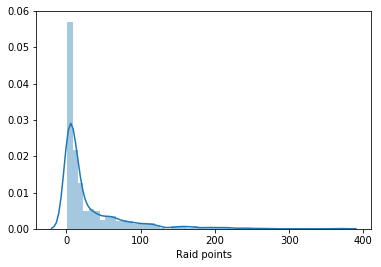

In [550]:
sns.distplot(df_successful['Raid points'])
plt.show()

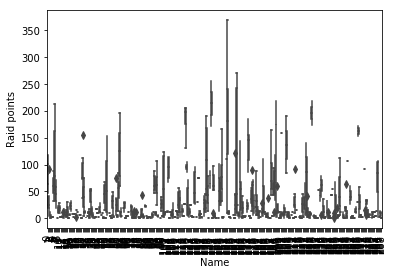

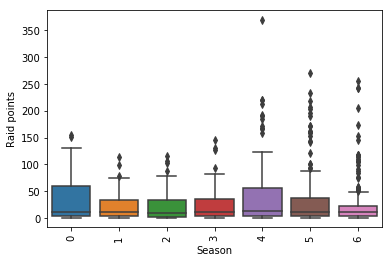

In [551]:
cat_var = list(set(df_successful.columns) - set(num_var))
for idx in cat_var:
    sns.boxplot(x=df_successful[idx], y=df_successful['Raid points'])
    plt.xticks(rotation=90)
    plt.show()

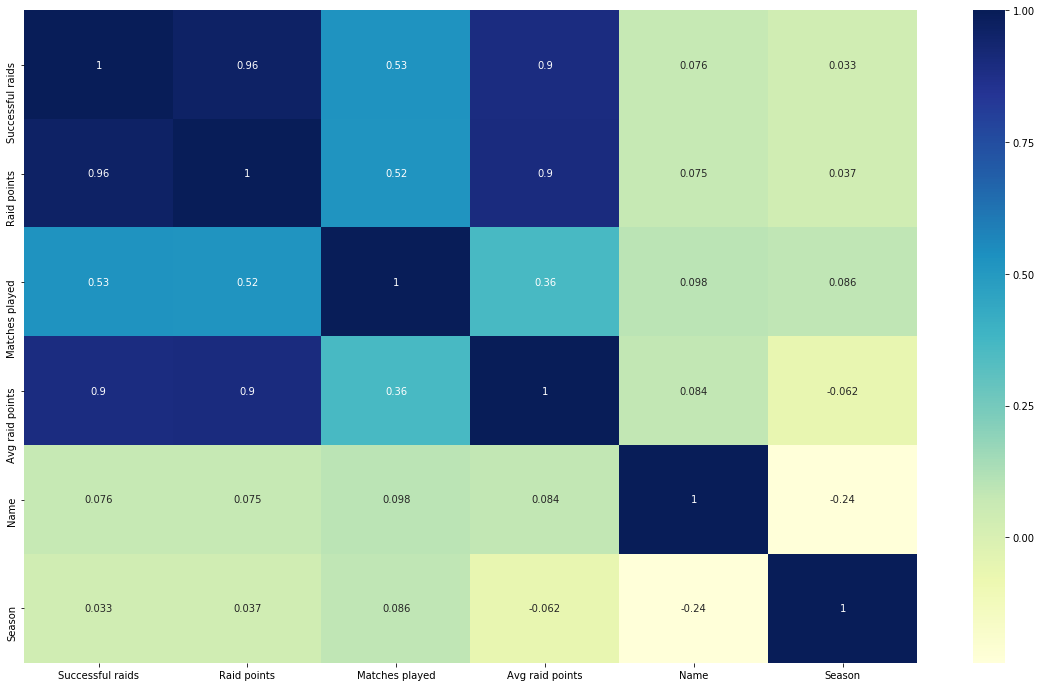

In [552]:
plt.figure(figsize=(20, 12))
sns.heatmap(df_successful.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [553]:
df_successful.drop(['Avg raid points'],axis=1,inplace=True)

In [554]:
df_train = df_successful[df_successful['Season']!=6]
df_test = df_successful[df_successful['Season']==6]

In [555]:
num_var.remove('Avg raid points')
len(df_train[num_var])

621

In [556]:
scaler = MinMaxScaler()
df_train[num_var] = scaler.fit_transform(df_train[num_var])
df_test[num_var] = scaler.fit_transform(df_test[num_var])

In [557]:
y_train = df_train.pop('Raid points')
X_train = df_train

In [558]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

In [559]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))
col = X_train.columns[rfe.support_]

In [560]:
X_train_rfe = X_train[col]
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Raid points   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     1657.
Date:                Wed, 02 Oct 2019   Prob (F-statistic):               0.00
Time:                        15:35:45   Log-Likelihood:                 1171.6
No. Observations:                 621   AIC:                            -2333.
Df Residuals:                     616   BIC:                            -2311.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0006      0.005     -0.132      0.895      -0.010       0.009
Successful raids     0.8633      0.013     68.055      0.000       0.838       0.888
Matches played       0.0147      0.008      1.918      0.056      -0.000       0.030
Name              1.982e-06   1.81e-05      0.110      0.913   -3.36e-05    3.75e-05
Season              -0.0002      0.001     -0.170      0.865      -0.002       0.002
==============================================================================
Omnibus:                      424.267   Durbin-Watson:                   2.735
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1364298.487
Skew:                          -1.296   Prob(JB):                         0.00
Kurtosis:                     232.608   Cond. No.                     1.50e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [561]:
X_train_new = X_train_rfe.drop(["Name"], axis = 1)
X_train_rfe = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_rfe).fit() 
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Raid points   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     2213.
Date:                Wed, 02 Oct 2019   Prob (F-statistic):               0.00
Time:                        15:35:45   Log-Likelihood:                 1171.6
No. Observations:                 621   AIC:                            -2335.
Df Residuals:                     617   BIC:                            -2317.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0003      0.004     -0.082      0.934      -0.008       0.007
Successful raids     0.8633      0.013     68.110      0.000       0.838       0.888
Matches played       0.0147      0.008      1.921      0.055      -0.000       0.030
Season              -0.0002      0.001     -0.188      0.851      -0.002       0.002
==============================================================================
Omnibus:                      423.318   Durbin-Watson:                   2.735
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1364016.636
Skew:                          -1.288   Prob(JB):                         0.00
Kurtosis:                     232.584   Cond. No.                         32.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [562]:
X_train_new = X_train_rfe.drop(["Season"], axis = 1)
X_train_rfe = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_rfe).fit() 
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Raid points   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     3325.
Date:                Wed, 02 Oct 2019   Prob (F-statistic):               0.00
Time:                        15:35:46   Log-Likelihood:                 1171.6
No. Observations:                 621   AIC:                            -2337.
Df Residuals:                     618   BIC:                            -2324.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0007      0.003     -0.210      0.834      -0.007       0.006
Successful raids     0.8633      0.013     68.189      0.000       0.838       0.888
Matches played       0.0144      0.007      1.922      0.055      -0.000       0.029
==============================================================================
Omnibus:                      424.013   Durbin-Watson:                   2.735
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1364215.879
Skew:                          -1.294   Prob(JB):                         0.00
Kurtosis:                     232.601   Cond. No.                         10.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [563]:
# X_train_new = X_train_rfe.drop(["Avg raid points"], axis = 1)
# X_train_rfe = sm.add_constant(X_train_new)
# lm = sm.OLS(y_train,X_train_rfe).fit() 
# lm.summary()

In [564]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train_new = X_train_new.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Successful raids,1.91
1,Matches played,1.91


In [565]:
X_train_new = sm.add_constant(X_train_new)
y_train_price = lm.predict(X_train_new)

Text(0.5, 0.98, 'Residuals')

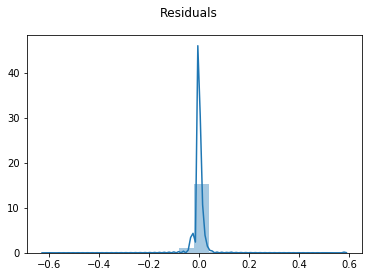

In [566]:
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Residuals') 

In [567]:
df_test

,Successful raids,Raid points,Matches played,Name,Season
413,1.000000,1.000000,1.000000,141,6
414,0.891509,0.949020,0.947368,155,6
415,0.877358,0.945098,0.947368,163,6
416,0.801887,0.800000,1.000000,119,6
417,0.669811,0.678431,0.894737,228,6
418,0.556604,0.596078,0.789474,268,6
419,0.528302,0.568627,1.000000,62,6
420,0.481132,0.458824,0.842105,0,6
421,0.452830,0.458824,1.000000,173,6
422,0.443396,0.458824,1.000000,196,6


In [568]:
y_test = df_test.pop('Raid points')
X_test = df_test

In [569]:
X_train_new.drop(['const'], axis=1,inplace=True)
X_test_new = X_test[X_train_new.columns]

X_test_new = sm.add_constant(X_test_new)

In [570]:
X_train_new

,Successful raids,Matches played
579,0.770370,0.92
580,0.681481,0.80
581,0.651852,0.84
582,0.622222,0.80
583,0.596296,0.84
584,0.585185,0.88
585,0.581481,0.84
586,0.529630,0.84
587,0.500000,0.80
588,0.500000,0.84


In [571]:
y_pred = lm.predict(X_test_new)

Text(0, 0.5, 'y_pred')

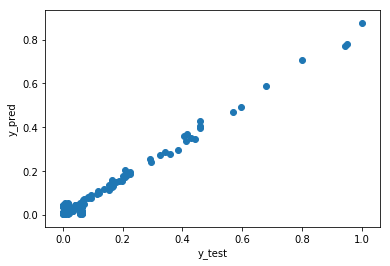

In [572]:
# Plot test v/s predicted values
fig = plt.figure()
plt.scatter(y_test,y_pred)
plt.xlabel('y_test') 
plt.ylabel('y_pred') 

Text(0.5, 0.98, 'Residuals')

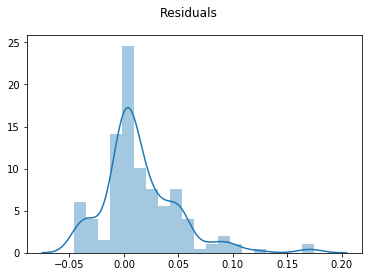

In [573]:
fig = plt.figure()
sns.distplot((y_test - y_pred), bins = 20)
fig.suptitle('Residuals')    

In [574]:
lm = sm.OLS(y_test,X_test_new).fit() 
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Raid points   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     5125.
Date:                Wed, 02 Oct 2019   Prob (F-statistic):          4.63e-158
Time:                        15:35:46   Log-Likelihood:                 424.68
No. Observations:                 181   AIC:                            -843.4
Df Residuals:                     178   BIC:                            -833.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0063      0.004      1.720      0.087      -0.001       0.014
Successful raids     1.0285      0.012     86.432      0.000       1.005       1.052
Matches played      -0.0006      0.007     -0.082      0.935      -0.015       0.013
==============================================================================
Omnibus:                        1.764   Durbin-Watson:                   0.586
Prob(Omnibus):                  0.414   Jarque-Bera (JB):                1.483
Skew:                           0.041   Prob(JB):                        0.476
Kurtosis:                       3.436   Cond. No.                         8.34
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [575]:
'RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_pred))

('RMSE :', 0.03812065724806512)

In [576]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9537662198552221

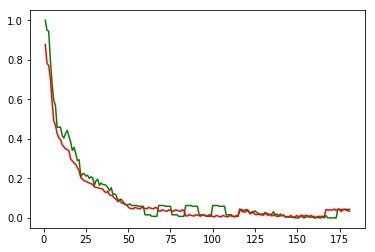

In [577]:
idx = [i for i in range(1,len(y_test)+1,1)]
plt.plot(idx, y_test,c='green')
plt.plot(idx, y_pred,c='red')
plt.show()

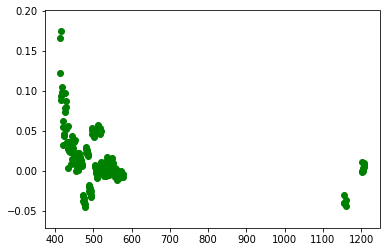

In [578]:
plt.scatter(y_test.index, y_test-y_pred,c='green')
plt.show()

In [579]:
df_test

,Successful raids,Matches played,Name,Season
413,1.000000,1.000000,141,6
414,0.891509,0.947368,155,6
415,0.877358,0.947368,163,6
416,0.801887,1.000000,119,6
417,0.669811,0.894737,228,6
418,0.556604,0.789474,268,6
419,0.528302,1.000000,62,6
420,0.481132,0.842105,0,6
421,0.452830,1.000000,173,6
422,0.443396,1.000000,196,6


In [580]:
df_test = df_player_raids[df_player_raids['Season'] == 'SEASON 7']
df_test

,Name,Successful raids,Season,Raid points,Matches played,Avg raid points
413,Naveen Kumar,213.0,SEASON 7,256.0,20.0,12.80
414,Pardeep Narwal,190.0,SEASON 7,243.0,19.0,12.79
415,Pawan Kumar Sehrawat,187.0,SEASON 7,242.0,19.0,12.74
416,Maninder Singh,171.0,SEASON 7,205.0,20.0,10.25
417,Siddharth Sirish Desai,143.0,SEASON 7,174.0,18.0,9.67
418,Vikash Kandola,119.0,SEASON 7,153.0,16.0,9.56
419,Deepak Niwas Hooda,113.0,SEASON 7,146.0,20.0,7.30
420,Abhishek Singh,103.0,SEASON 7,118.0,17.0,6.94
421,Rahul Chaudhari,97.0,SEASON 7,118.0,20.0,5.90
422,Rohit Gulia,95.0,SEASON 7,118.0,20.0,5.90


In [581]:
df_test['Predicted'] = y_pred
len(y_pred)

181

In [582]:
df_player_raids = df_test[['Name','Predicted']]
df_player_raids.sort_values(by=['Predicted'],ascending=False,inplace=True)
rank = [x for x in range(1,len(df_player_raids)+1)]
df_player_raids['Rank'] = rank
df_player_raids.reset_index(inplace=True)
df_player_raids.drop('index',axis=1,inplace=True)
df_player_raids.head(10)

,Name,Predicted,Rank
0,Naveen Kumar,0.877052,1
1,Pardeep Narwal,0.782632,2
2,Pawan Kumar Sehrawat,0.770415,3
3,Maninder Singh,0.706017,4
4,Siddharth Sirish Desai,0.590476,5
5,Vikash Kandola,0.491225,6
6,Deepak Niwas Hooda,0.469825,7
7,Abhishek Singh,0.426827,8
8,Rahul Chaudhari,0.404669,9
9,Rohit Gulia,0.396524,10


As observed, top player for successful raids is Naveen Kumar followed by Pardeep Narwal, Pawan Kumar Sehrawat, Maninder Singh and Siddharth Sirish Desai

Let's perform linear regression for tackle points of a player and find the top players.

Tackles

In [583]:
df_player_tackles= pd.read_csv('Player Tackle.csv')
df_player_tackles

,Unnamed: 0,Rank_x,Name,Successful tackles,Season,Rank_y,Tackle points,Rank,Position,Matches played,Avg tackle points,Team
0,0,1.0,Manjeet Chhillar,324.0,ALL SEASONS,1.0,339.0,5.0,All Rounder,108.0,3.14,Tamil Thalaivas
1,1,2.0,Ravinder Pahal,301.0,ALL SEASONS,2.0,320.0,9.0,"Defender, Right Corner",109.0,2.94,Dabang Delhi Kc
2,2,3.0,Fazel Atrachali,277.0,ALL SEASONS,4.0,295.0,8.0,"Defender, Left Corner",98.0,3.01,U Mumba
3,3,4.0,Sandeep Narwal,268.0,ALL SEASONS,3.0,296.0,21.0,All Rounder,120.0,2.47,U Mumba
4,4,5.0,Mohit Chhillar,254.0,ALL SEASONS,5.0,277.0,17.0,"Defender, Right Corner",109.0,2.54,Tamil Thalaivas
5,5,6.0,PO Surjeet Singh,250.0,ALL SEASONS,6.0,266.0,10.0,"Defender, Right Cover",92.0,2.89,Puneri Paltan
6,6,7.0,Girish Maruti Ernak,245.0,ALL SEASONS,7.0,259.0,20.0,"Defender, Left Corner",104.0,2.49,Puneri Paltan
7,7,8.0,Dharmaraj Cheralathan,232.0,ALL SEASONS,8.0,257.0,26.0,"Defender, Right And Left Corner",116.0,2.22,Haryana Steelers
8,8,9.0,Ran Singh,217.0,ALL SEASONS,9.0,229.0,36.0,All Rounder,118.0,1.94,Tamil Thalaivas
9,9,10.0,Amit Hooda,211.0,ALL SEASONS,9.0,229.0,12.0,"Defender, Right Corner",86.0,2.66,Jaipur Pink Panthers


In [584]:
df_player_tackles.drop(['Rank_x','Unnamed: 0','Rank_y','Rank'],axis=1,inplace=True)

In [585]:
df_player_tackles = df_player_tackles[df_player_tackles['Season']!='ALL SEASONS']
df_player_tackles.isnull().sum()
len(df_player_tackles)

1018

In [586]:
df_player_tackles.dropna(inplace=True)

In [587]:
df_player_tackles.isnull().sum()
len(df_player_tackles)

893

In [588]:
df_player_tackles

,Name,Successful tackles,Season,Tackle points,Position,Matches played,Avg tackle points,Team
515,Sandeep Kumar Dhull,60.0,SEASON 7,67.0,"Defender, Left Corner",20.0,3.35,Jaipur Pink Panthers
516,Sumit,60.0,SEASON 7,61.0,"Defender, Left Corner",18.0,3.39,Up Yoddha
517,Sumit,60.0,SEASON 7,1.0,"Defender, Left Corner",18.0,3.39,Up Yoddha
518,Sumit,1.0,SEASON 7,61.0,"Defender, Left Corner",18.0,3.39,Up Yoddha
519,Sumit,1.0,SEASON 7,1.0,"Defender, Left Corner",18.0,3.39,Up Yoddha
520,Ravinder Pahal,57.0,SEASON 7,57.0,"Defender, Right Corner",20.0,2.85,Dabang Delhi Kc
521,Fazel Atrachali,57.0,SEASON 7,60.0,"Defender, Left Corner",19.0,3.16,U Mumba
522,Baldev Singh,54.0,SEASON 7,59.0,"Defender, Right Corner",20.0,2.95,Bengal Warriors
523,Vishal Bhardwaj,52.0,SEASON 7,61.0,Defender,18.0,3.39,Telugu Titans
524,Rinku Narwal,51.0,SEASON 7,53.0,Defender,20.0,2.65,Bengal Warriors


In [589]:
#Get numerical variables from dataframe
num_var = list(df_player_tackles._get_numeric_data())

In [590]:
from sklearn import preprocessing
df_successful_categorical = df_player_tackles.select_dtypes(include=['object'])
df_successful_categorical = df_successful_categorical.astype('category')

In [591]:

le = preprocessing.LabelEncoder()
df_successful_categorical1 = df_successful_categorical.astype(str).apply(le.fit_transform)
df_successful = df_player_tackles.drop(df_successful_categorical1.columns, axis=1)
df_successful = pd.concat([df_successful, df_successful_categorical1], axis=1)
df_successful.head()

,Successful tackles,Tackle points,Matches played,Avg tackle points,Name,Season,Position,Team
515,60.0,67.0,20.0,3.35,196,6,2,5
516,60.0,61.0,18.0,3.39,224,6,2,11
517,60.0,1.0,18.0,3.39,224,6,2,11
518,1.0,61.0,18.0,3.39,224,6,2,11
519,1.0,1.0,18.0,3.39,224,6,2,11


In [592]:
len(df_successful)

893

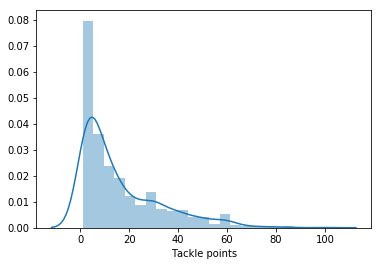

In [593]:
sns.distplot(df_successful['Tackle points'])
plt.show()

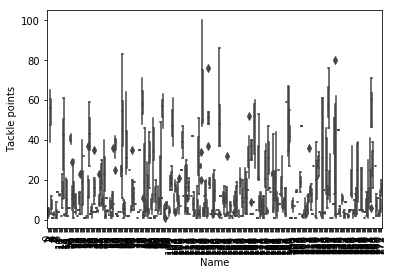

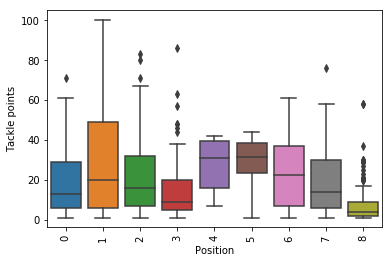

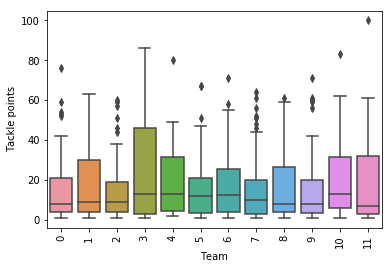

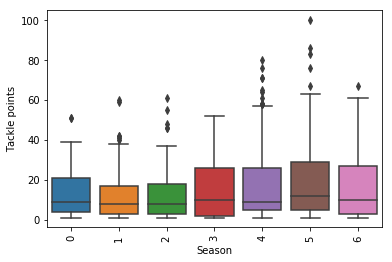

In [594]:
cat_var = list(set(df_successful.columns) - set(num_var))
for idx in cat_var:
    sns.boxplot(x=df_successful[idx], y=df_successful['Tackle points'])
    plt.xticks(rotation=90)
    plt.show()

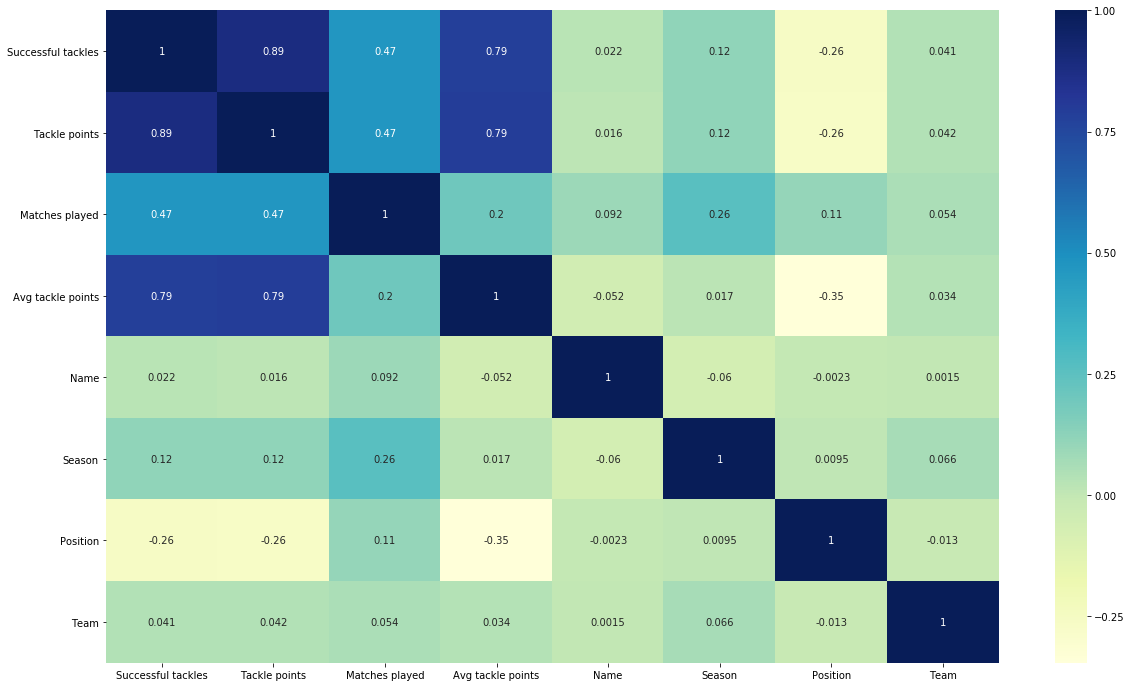

In [595]:
plt.figure(figsize=(20, 12))
sns.heatmap(df_successful.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [596]:
df_successful.drop(['Successful tackles'],axis=1,inplace=True)

In [597]:
df_train = df_successful[df_successful['Season']!=6]
df_test = df_successful[df_successful['Season']==6]

In [598]:
num_var.remove('Successful tackles')

In [599]:
scaler = MinMaxScaler()
df_train[num_var] = scaler.fit_transform(df_train[num_var])
df_test[num_var] = scaler.fit_transform(df_test[num_var])

In [600]:
y_train = df_train.pop('Tackle points')
X_train = df_train

In [601]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

In [602]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))
col = X_train.columns[rfe.support_]

In [603]:
X_train_rfe = X_train[col]
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Tackle points   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     317.7
Date:                Wed, 02 Oct 2019   Prob (F-statistic):          1.50e-200
Time:                        15:36:10   Log-Likelihood:                 758.19
No. Observations:                 744   AIC:                            -1502.
Df Residuals:                     737   BIC:                            -1470.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.1245      0.013     -9.726      0.000      -0.150      -0.099
Matches played        0.2204      0.014     15.299      0.000       0.192       0.249
Avg tackle points     0.5797      0.018     32.823      0.000       0.545       0.614
Name               6.044e-05   4.01e-05      1.508      0.132   -1.82e-05       0.000
Season                0.0040      0.002      1.994      0.047    6.16e-05       0.008
Position             -0.0026      0.001     -2.319      0.021      -0.005      -0.000
Team                  0.0006      0.001      0.649      0.517      -0.001       0.002
==============================================================================
Omnibus:                      138.768   Durbin-Watson:                   1.823
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1611.785
Skew:                           0.448   Prob(JB):                         0.00
Kurtosis:                      10.155   Cond. No.                         954.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [604]:
X_train_new = X_train_rfe.drop(["Team"], axis = 1)
X_train_rfe = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_rfe).fit() 
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Tackle points   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     381.4
Date:                Wed, 02 Oct 2019   Prob (F-statistic):          9.00e-202
Time:                        15:36:10   Log-Likelihood:                 757.98
No. Observations:                 744   AIC:                            -1504.
Df Residuals:                     738   BIC:                            -1476.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.1215      0.012    -10.181      0.000      -0.145      -0.098
Matches played        0.2210      0.014     15.364      0.000       0.193       0.249
Avg tackle points     0.5796      0.018     32.831      0.000       0.545       0.614
Name                6.04e-05   4.01e-05      1.508      0.132   -1.82e-05       0.000
Season                0.0040      0.002      2.014      0.044       0.000       0.008
Position             -0.0026      0.001     -2.357      0.019      -0.005      -0.000
==============================================================================
Omnibus:                      140.737   Durbin-Watson:                   1.823
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1623.946
Skew:                           0.466   Prob(JB):                         0.00
Kurtosis:                      10.178   Cond. No.                         948.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [605]:
X_train_new = X_train_rfe.drop(["Name"], axis = 1)
X_train_rfe = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_rfe).fit() 
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Tackle points   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     475.4
Date:                Wed, 02 Oct 2019   Prob (F-statistic):          1.20e-202
Time:                        15:36:10   Log-Likelihood:                 756.83
No. Observations:                 744   AIC:                            -1504.
Df Residuals:                     739   BIC:                            -1481.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.1132      0.011    -10.671      0.000      -0.134      -0.092
Matches played        0.2232      0.014     15.594      0.000       0.195       0.251
Avg tackle points     0.5773      0.018     32.797      0.000       0.543       0.612
Season                0.0039      0.002      1.938      0.053   -4.95e-05       0.008
Position             -0.0026      0.001     -2.369      0.018      -0.005      -0.000
==============================================================================
Omnibus:                      146.553   Durbin-Watson:                   1.814
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1652.694
Skew:                           0.518   Prob(JB):                         0.00
Kurtosis:                      10.228   Cond. No.                         36.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [606]:
X_train_new = X_train_rfe.drop(["Season"], axis = 1)
X_train_rfe = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_rfe).fit() 
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Tackle points   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                     630.2
Date:                Wed, 02 Oct 2019   Prob (F-statistic):          2.87e-203
Time:                        15:36:10   Log-Likelihood:                 754.95
No. Observations:                 744   AIC:                            -1502.
Df Residuals:                     740   BIC:                            -1483.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.1038      0.009    -10.993      0.000      -0.122      -0.085
Matches played        0.2316      0.014     16.954      0.000       0.205       0.258
Avg tackle points     0.5747      0.018     32.684      0.000       0.540       0.609
Position             -0.0028      0.001     -2.514      0.012      -0.005      -0.001
==============================================================================
Omnibus:                      159.074   Durbin-Watson:                   1.825
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1700.895
Skew:                           0.624   Prob(JB):                         0.00
Kurtosis:                      10.302   Cond. No.                         32.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [607]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train_new = X_train_new.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Matches played,3.98
1,Avg tackle points,2.42
2,Position,2.32


In [608]:
X_train_new = sm.add_constant(X_train_new)
y_train_price = lm.predict(X_train_new)

Text(0.5, 0.98, 'Residuals')

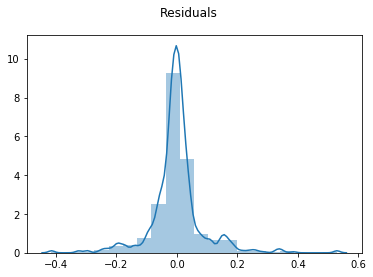

In [609]:
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Residuals') 

In [610]:
y_test = df_test.pop('Tackle points')
X_test = df_test

In [611]:
X_train_new.drop(['const'], axis=1,inplace=True)
X_test_new = X_test[X_train_new.columns]

X_test_new = sm.add_constant(X_test_new)

In [612]:
y_pred = lm.predict(X_test_new)

Text(0, 0.5, 'y_pred')

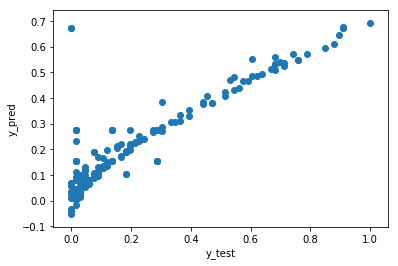

In [613]:
# Plot test v/s predicted values
fig = plt.figure()
plt.scatter(y_test,y_pred)
plt.xlabel('y_test') 
plt.ylabel('y_pred') 

Text(0.5, 0.98, 'Residuals')

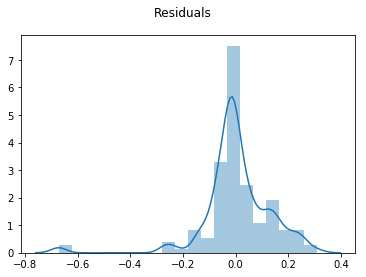

In [614]:
fig = plt.figure()
sns.distplot((y_test - y_pred), bins = 20)
fig.suptitle('Residuals')    

In [615]:
lm = sm.OLS(y_test,X_test_new).fit() 
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Tackle points   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     183.0
Date:                Wed, 02 Oct 2019   Prob (F-statistic):           4.38e-49
Time:                        15:36:12   Log-Likelihood:                 103.02
No. Observations:                 149   AIC:                            -198.0
Df Residuals:                     145   BIC:                            -186.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.1812      0.033     -5.531      0.000      -0.246      -0.116
Matches played        0.3103      0.043      7.201      0.000       0.225       0.395
Avg tackle points     0.6907      0.042     16.405      0.000       0.608       0.774
Position             -0.0052      0.003     -1.561      0.121      -0.012       0.001
==============================================================================
Omnibus:                      148.936   Durbin-Watson:                   2.155
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2946.691
Skew:                          -3.608   Prob(JB):                         0.00
Kurtosis:                      23.557   Cond. No.                         29.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [616]:
'RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_pred))

('RMSE :', 0.12968495428480303)

In [617]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7607253776229526

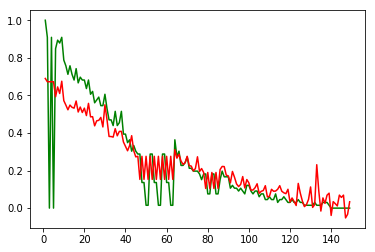

In [618]:
idx = [i for i in range(1,len(y_test)+1,1)]
plt.plot(idx, y_test,c='green')
plt.plot(idx, y_pred,c='red')
plt.show()

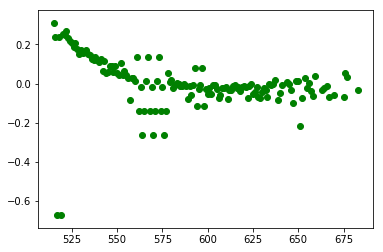

In [619]:
plt.scatter(y_test.index, y_test-y_pred,c='green')
plt.show()

In [620]:
df_test['Name'] = df_player_tackles[df_player_tackles['Season'] == 'SEASON 7']
df_test

,Matches played,Avg tackle points,Name,Season,Position,Team
515,1.000000,0.987988,Sandeep Kumar Dhull,6,2,5
516,0.894737,1.000000,Sumit,6,2,11
517,0.894737,1.000000,Sumit,6,2,11
518,0.894737,1.000000,Sumit,6,2,11
519,0.894737,1.000000,Sumit,6,2,11
520,1.000000,0.837838,Ravinder Pahal,6,6,2
521,0.947368,0.930931,Fazel Atrachali,6,2,10
522,1.000000,0.867868,Baldev Singh,6,6,0
523,0.894737,1.000000,Vishal Bhardwaj,6,1,9
524,1.000000,0.777778,Rinku Narwal,6,1,0


In [621]:
df_test['Predicted'] = y_pred
len(y_pred)

149

In [622]:
df_player_successfultackle = df_test[['Name','Predicted']]
df_player_successfultackle.sort_values(by=['Predicted'],ascending=False,inplace=True)
df_player_successfultackle.drop_duplicates(inplace=True)
rank = [x for x in range(1,len(df_player_successfultackle)+1)]
df_player_successfultackle['Rank'] = rank
df_player_successfultackle.head(10)

,Name,Predicted,Rank
515,Sandeep Kumar Dhull,0.690152,1
523,Vishal Bhardwaj,0.675436,2
516,Sumit,0.672671,3
521,Fazel Atrachali,0.645169,4
522,Baldev Singh,0.610058,5
520,Ravinder Pahal,0.592800,6
524,Rinku Narwal,0.572109,7
530,Nitesh Kumar,0.570161,8
536,Mahender Singh,0.557505,9
544,Vishal,0.550045,10


As we observed here for players with successful tackles, Sandeep Kumar Dhull is top contender followed by Vishal Bhardwaj, Sumit, Fazel and Baldev.

Lets find Top team in points table using "Team Data". For this we will use linear regression

In [623]:
df_player_team= pd.read_csv('Team Data.csv')
df_player_team

,Unnamed: 0,Rank,Played,Won,Lost,Tie,Points,Year,Season,Team
0,0,1,22,17,3,2,93,2018,6,3
1,1,2,22,15,5,2,86,2018,6,10
2,2,3,22,13,7,2,78,2018,6,1
3,3,4,22,12,8,2,69,2018,6,0
4,4,5,22,11,9,2,68,2018,6,2
5,5,6,22,8,10,4,57,2018,6,11
6,6,7,22,9,11,2,55,2018,6,6
7,7,8,22,8,12,2,52,2018,6,7
8,8,9,22,8,13,1,51,2018,6,9
9,9,10,22,6,13,3,43,2018,6,5


In [640]:
len(df_team)

56

In [624]:
df_player_team.drop(['Unnamed: 0','Rank'],axis=1,inplace=True)

In [626]:
df_player_team.isnull().sum()
len(df_player_team)

56

In [627]:
df_player_team.dropna(inplace=True)

In [628]:
df_player_team.isnull().sum()
len(df_player_team)

56

In [629]:
lstDF[-1].head()

,Rank,Team,Played,Won,Lost,Tie,Points,Year,Season
0,1,Dabang Delhi,20,15,3,2,82,2019,7
1,2,Bengal Warriors,20,13,4,3,78,2019,7
2,3,Haryana Steelers,19,12,6,1,65,2019,7
3,4,Bengaluru Bulls,19,10,8,1,58,2019,7
4,5,UP Yoddha,18,10,6,2,58,2019,7


In [630]:
df_player_team

,Played,Won,Lost,Tie,Points,Year,Season,Team
0,22,17,3,2,93,2018,6,3
1,22,15,5,2,86,2018,6,10
2,22,13,7,2,78,2018,6,1
3,22,12,8,2,69,2018,6,0
4,22,11,9,2,68,2018,6,2
5,22,8,10,4,57,2018,6,11
6,22,9,11,2,55,2018,6,6
7,22,8,12,2,52,2018,6,7
8,22,8,13,1,51,2018,6,9
9,22,6,13,3,43,2018,6,5


In [631]:
#Get numerical variables from dataframe
num_var = list(df_player_team._get_numeric_data())
num_var

['Played', 'Won', 'Lost', 'Tie', 'Points', 'Year', 'Season', 'Team']

In [632]:
from sklearn import preprocessing
df_successful_categorical = df_player_team.select_dtypes(include=['object'])
# df_successful_categorical = df_successful_categorical.astype('category')
df_successful_categorical

""
0
1
2
3
4
5
6
7
8
9


In [633]:
len(df_player_team)

56

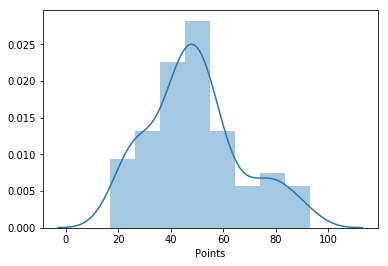

In [634]:
sns.distplot(df_player_team['Points'])
plt.show()

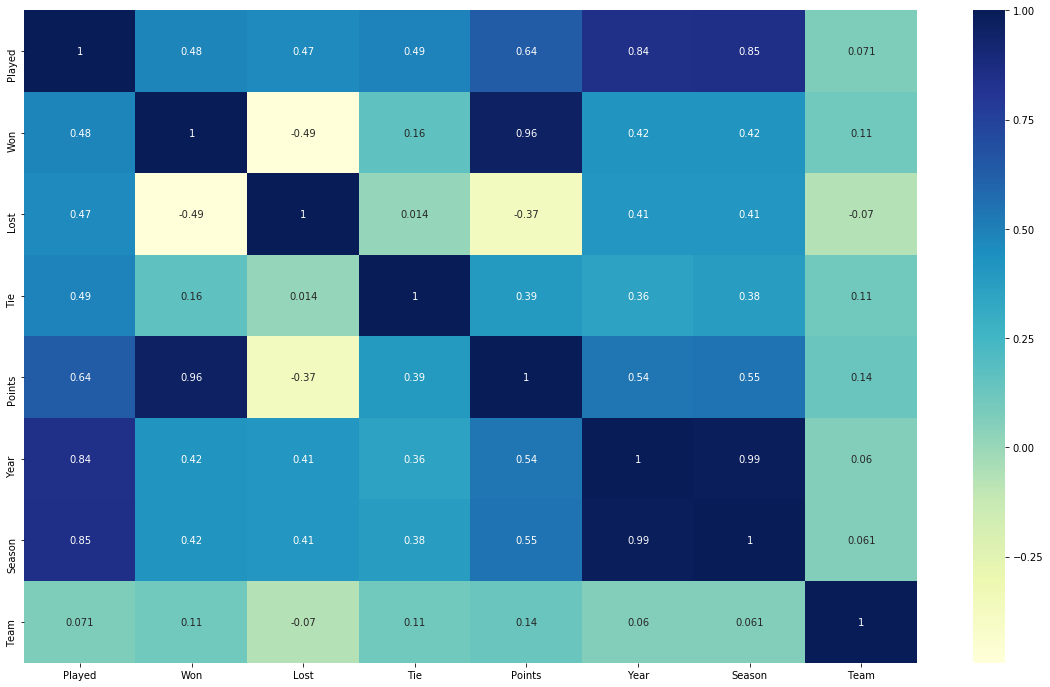

In [635]:
plt.figure(figsize=(20, 12))
sns.heatmap(df_player_team.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [636]:
df_player_team.drop(['Season'],axis=1,inplace=True)

In [641]:
df_player_team

,Played,Won,Lost,Tie,Points,Year,Team
0,22,17,3,2,93,2018,3
1,22,15,5,2,86,2018,10
2,22,13,7,2,78,2018,1
3,22,12,8,2,69,2018,0
4,22,11,9,2,68,2018,2
5,22,8,10,4,57,2018,11
6,22,9,11,2,55,2018,6
7,22,8,12,2,52,2018,7
8,22,8,13,1,51,2018,9
9,22,6,13,3,43,2018,5


In [644]:
lstDF[-1]

,Team,Played,Won,Lost,Tie,Points,Year,Season
0,Dabang Delhi,20,15,3,2,82,2019,7
1,Bengal Warriors,20,13,4,3,78,2019,7
2,Haryana Steelers,19,12,6,1,65,2019,7
3,Bengaluru Bulls,19,10,8,1,58,2019,7
4,UP Yoddha,18,10,6,2,58,2019,7
5,U Mumba,18,9,8,1,54,2019,7
6,Jaipur Pink Panthers,20,8,10,2,52,2019,7
7,Gujarat Fortune Giants,20,6,12,2,45,2019,7
8,Puneri Paltan,20,6,11,3,42,2019,7
9,Patna Pirates,19,6,12,1,40,2019,7


In [649]:
df_test = lstDF[-1]
df_test.drop(['Rank','Season'],axis=1,inplace=True)
df_team_data = df_test['Team']

KeyError: "['Rank' 'Season'] not found in axis"

In [650]:
df_test

,Team,Played,Won,Lost,Tie,Points,Year
0,Dabang Delhi,20,15,3,2,82,2019
1,Bengal Warriors,20,13,4,3,78,2019
2,Haryana Steelers,19,12,6,1,65,2019
3,Bengaluru Bulls,19,10,8,1,58,2019
4,UP Yoddha,18,10,6,2,58,2019
5,U Mumba,18,9,8,1,54,2019
6,Jaipur Pink Panthers,20,8,10,2,52,2019
7,Gujarat Fortune Giants,20,6,12,2,45,2019
8,Puneri Paltan,20,6,11,3,42,2019
9,Patna Pirates,19,6,12,1,40,2019


In [653]:
from sklearn import preprocessing
df_categorical_team = df_test.select_dtypes(include=['object'])
le = preprocessing.LabelEncoder()
df_categorical_team = df_categorical_team.apply(le.fit_transform)
df_test = df_test.drop(df_categorical_team.columns, axis=1)
df_test = pd.concat([df_test, df_categorical_team], axis=1)
df_test.head()

,Played,Won,Lost,Tie,Points,Year,Team
0,20,15,3,2,82,2019,2
1,20,13,4,3,78,2019,0
2,19,12,6,1,65,2019,4
3,19,10,8,1,58,2019,1
4,18,10,6,2,58,2019,11


In [654]:
df_train = df_player_team

In [655]:
num_var.remove('Season')

In [656]:
df_test

,Played,Won,Lost,Tie,Points,Year,Team
0,20,15,3,2,82,2019,2
1,20,13,4,3,78,2019,0
2,19,12,6,1,65,2019,4
3,19,10,8,1,58,2019,1
4,18,10,6,2,58,2019,11
5,18,9,8,1,54,2019,10
6,20,8,10,2,52,2019,5
7,20,6,12,2,45,2019,3
8,20,6,11,3,42,2019,7
9,19,6,12,1,40,2019,6


In [657]:
scaler = MinMaxScaler()
df_train[num_var] = scaler.fit_transform(df_train[num_var])
df_test[num_var] = scaler.fit_transform(df_test[num_var])

In [658]:
y_train = df_train.pop('Points')
X_train = df_train

In [659]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

In [660]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))
col = X_train.columns[rfe.support_]

In [661]:
X_train_rfe = X_train[col]
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Points   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     1526.
Date:                Wed, 02 Oct 2019   Prob (F-statistic):           2.19e-53
Time:                        15:56:43   Log-Likelihood:                 143.03
No. Observations:                  56   AIC:                            -274.1
Df Residuals:                      50   BIC:                            -261.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2178      0.006     39.174      0.000       0.207       0.229
Played         0.2422      0.009     27.075      0.000       0.224       0.260
Won            0.5464      0.008     66.148      0.000       0.530       0.563
Lost          -0.3185      0.008    -42.262      0.000      -0.334      -0.303
Tie            0.0631      0.013      4.979      0.000       0.038       0.088
Year          -0.0028      0.015     -0.182      0.857      -0.033       0.028
Team           0.0067      0.009      0.788      0.435      -0.010       0.024
==============================================================================
Omnibus:                        1.800   Durbin-Watson:                   1.849
Prob(Omnibus):                  0.407   Jarque-Bera (JB):                1.598
Skew:                          -0.407   Prob(JB):                        0.450
Kurtosis:                       2.847   Cond. No.                     1.68e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.5e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [662]:
X_train_new = X_train_rfe.drop(["Year"], axis = 1)
X_train_rfe = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_rfe).fit() 
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Points   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     1945.
Date:                Wed, 02 Oct 2019   Prob (F-statistic):           4.71e-55
Time:                        15:56:51   Log-Likelihood:                 143.02
No. Observations:                  56   AIC:                            -276.0
Df Residuals:                      51   BIC:                            -265.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2173      0.005     46.358      0.000       0.208       0.227
Played         0.2408      0.005     45.847      0.000       0.230       0.251
Won            0.5458      0.008     72.572      0.000       0.531       0.561
Lost          -0.3190      0.007    -46.302      0.000      -0.333      -0.305
Tie            0.0631      0.013      5.036      0.000       0.038       0.088
Team           0.0067      0.008      0.794      0.431      -0.010       0.024
==============================================================================
Omnibus:                        1.836   Durbin-Watson:                   1.847
Prob(Omnibus):                  0.399   Jarque-Bera (JB):                1.674
Skew:                          -0.413   Prob(JB):                        0.433
Kurtosis:                       2.808   Cond. No.                     1.38e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.58e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [663]:
X_train_new = X_train_rfe.drop(["Team"], axis = 1)
X_train_rfe = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_rfe).fit() 
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Points   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     2611.
Date:                Wed, 02 Oct 2019   Prob (F-statistic):           1.16e-56
Time:                        15:57:00   Log-Likelihood:                 142.67
No. Observations:                  56   AIC:                            -277.3
Df Residuals:                      52   BIC:                            -269.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2198      0.003     63.571      0.000       0.213       0.227
Played         0.2407      0.005     46.021      0.000       0.230       0.251
Won            0.5469      0.007     74.236      0.000       0.532       0.562
Lost          -0.3189      0.007    -46.461      0.000      -0.333      -0.305
Tie            0.0642      0.012      5.167      0.000       0.039       0.089
==============================================================================
Omnibus:                        2.041   Durbin-Watson:                   1.855
Prob(Omnibus):                  0.360   Jarque-Bera (JB):                1.732
Skew:                          -0.429   Prob(JB):                        0.421
Kurtosis:                       2.919   Cond. No.                     1.29e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.62e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [664]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train_new = X_train_new.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Played,3.47
3,Tie,2.91
1,Won,2.73
2,Lost,2.45


In [665]:
X_train_new = sm.add_constant(X_train_new)
y_train_price = lm.predict(X_train_new)

Text(0.5, 0.98, 'Residuals')

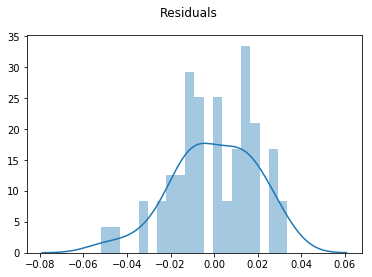

In [666]:
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Residuals') 

In [667]:
y_test = df_test.pop('Points')
X_test = df_test

In [668]:
X_train_new.drop(['const'], axis=1,inplace=True)
X_test_new = X_test[X_train_new.columns]

X_test_new = sm.add_constant(X_test_new)

In [669]:
y_pred = lm.predict(X_test_new)

Text(0, 0.5, 'y_pred')

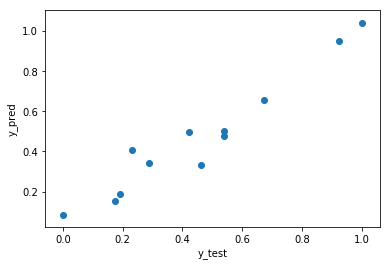

In [670]:
# Plot test v/s predicted values
fig = plt.figure()
plt.scatter(y_test,y_pred)
plt.xlabel('y_test') 
plt.ylabel('y_pred') 

Text(0.5, 0.98, 'Residuals')

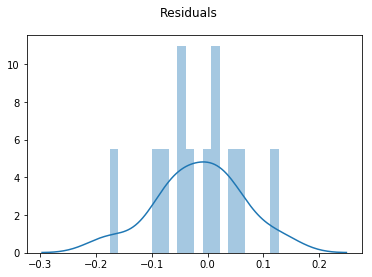

In [671]:
fig = plt.figure()
sns.distplot((y_test - y_pred), bins = 20)
fig.suptitle('Residuals')    

In [672]:
lm = sm.OLS(y_test,X_test_new).fit() 
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Points   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     301.6
Date:                Wed, 02 Oct 2019   Prob (F-statistic):           1.45e-08
Time:                        15:57:28   Log-Likelihood:                 26.232
No. Observations:                  12   AIC:                            -44.46
Df Residuals:                       8   BIC:                            -42.52
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3118      0.013     23.116      0.000       0.281       0.343
Played         0.1051      0.026      4.103      0.003       0.046       0.164
Won            0.5994      0.017     35.408      0.000       0.560       0.638
Lost          -0.3551      0.019    -18.773      0.000      -0.399      -0.311
Tie           -0.0005      0.024     -0.022      0.983      -0.057       0.056
==============================================================================
Omnibus:                        0.017   Durbin-Watson:                   2.969
Prob(Omnibus):                  0.991   Jarque-Bera (JB):                0.219
Skew:                          -0.061   Prob(JB):                        0.896
Kurtosis:                       2.349   Cond. No.                     2.00e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.57e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [673]:
'RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_pred))

('RMSE :', 0.07706696239723423)

In [674]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9295853796332003

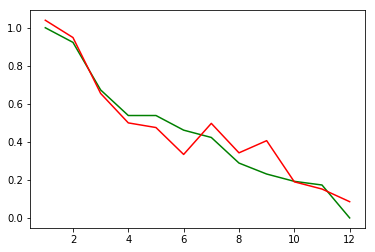

In [675]:
idx = [i for i in range(1,len(y_test)+1,1)]
plt.plot(idx, y_test,c='green')
plt.plot(idx, y_pred,c='red')
plt.show()

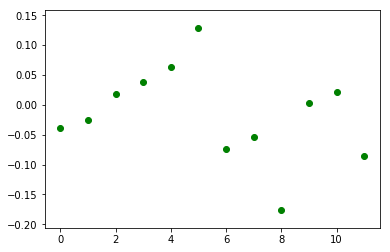

In [676]:
plt.scatter(y_test.index, y_test-y_pred,c='green')
plt.show()

In [677]:
df_test['Predicted'] = y_pred
len(y_pred)

12

In [681]:
df_test['Team'] = df_team_data
df_test

,Played,Won,Lost,Tie,Year,Team,Predicted
0,1.0,1.000000,0.0,0.5,0.0,Dabang Delhi,1.039439
1,1.0,0.833333,0.1,1.0,0.0,Bengal Warriors,0.948488
2,0.5,0.750000,0.3,0.0,0.0,Haryana Steelers,0.654610
3,0.5,0.583333,0.5,0.0,0.0,Bengaluru Bulls,0.499673
4,0.0,0.583333,0.3,0.5,0.0,UP Yoddha,0.475221
5,0.0,0.500000,0.5,0.0,0.0,U Mumba,0.333766
6,1.0,0.416667,0.7,0.5,0.0,Jaipur Pink Panthers,0.497159
7,1.0,0.250000,0.9,0.5,0.0,Gujarat Fortune Giants,0.342221
8,1.0,0.250000,0.8,1.0,0.0,Puneri Paltan,0.406207
9,0.5,0.250000,0.9,0.0,0.0,Patna Pirates,0.189798


In [682]:
df_team_data = df_test[['Team','Predicted']]
df_team_data.sort_values(by=['Predicted'],ascending=False,inplace=True)
rank = [x for x in range(1,len(df_team_data)+1)]
df_team_data['Rank'] = rank
df_team_data

,Team,Predicted,Rank
0,Dabang Delhi,1.039439,1
1,Bengal Warriors,0.948488,2
2,Haryana Steelers,0.654610,3
3,Bengaluru Bulls,0.499673,4
6,Jaipur Pink Panthers,0.497159,5
4,UP Yoddha,0.475221,6
8,Puneri Paltan,0.406207,7
7,Gujarat Fortune Giants,0.342221,8
5,U Mumba,0.333766,9
9,Patna Pirates,0.189798,10


As we can observe here, team won the tournament are Dabang Delhi followed by Bengal, Haryana, Bengaluru and jaipur for top 5 spots.

Lets find the top team for successful raids using "Team Raid.csv"

In [683]:
df_player_raid= pd.read_csv('Team Raid.csv')
df_player_raid

,Unnamed: 0,Rank_xx,Name,Successful raids,Season,Rank_yy,Raid points,Rank_x,Avg raid points,Rank_y,Do-or-Die raid points
0,0,1.0,Patna Pirates,2066.0,ALL SEASONS,1.0,2633.0,1.0,20.10,2.0,467.0
1,1,2.0,Telugu Titans,1843.0,ALL SEASONS,2.0,2286.0,3.0,18.74,8.0,434.0
2,2,3.0,Bengaluru Bulls,1810.0,ALL SEASONS,2.0,2286.0,5.0,18.29,4.0,456.0
3,3,4.0,U Mumba,1803.0,ALL SEASONS,4.0,2267.0,8.0,17.99,5.0,455.0
4,4,5.0,Bengal Warriors,1786.0,ALL SEASONS,5.0,2236.0,9.0,17.89,7.0,446.0
5,5,6.0,Dabang Delhi K.C.,1783.0,ALL SEASONS,6.0,2225.0,6.0,18.24,6.0,447.0
6,6,7.0,Jaipur Pink Panthers,1688.0,ALL SEASONS,7.0,2144.0,NaN,NaN,2.0,467.0
7,7,8.0,Puneri Paltan,1687.0,ALL SEASONS,8.0,2116.0,NaN,NaN,1.0,518.0
8,8,9.0,Gujarat Fortunegiants,992.0,ALL SEASONS,10.0,1205.0,10.0,17.46,10.0,231.0
9,9,10.0,Haryana Steelers,978.0,ALL SEASONS,9.0,1228.0,2.0,19.19,NaN,NaN


In [684]:
df_player_raid.drop(['Unnamed: 0','Rank_xx','Rank_yy','Rank_x','Rank_y'],axis=1,inplace=True)

In [685]:
df_player_raid = df_player_raid[df_player_raid['Season']!='ALL SEASONS']

In [686]:
df_player_raid.isnull().sum()
len(df_player_raid)

68

In [687]:
df_player_raid.dropna(inplace=True)

In [688]:
df_player_raid.isnull().sum()
len(df_player_raid)

52

In [689]:
#Get numerical variables from dataframe
num_var = list(df_player_raid._get_numeric_data())
num_var

['Successful raids', 'Raid points', 'Avg raid points', 'Do-or-Die raid points']

In [690]:
from sklearn import preprocessing
df_successful_categorical = df_player_raid.select_dtypes(include=['object'])
df_successful_categorical = df_successful_categorical.astype('category')
df_successful_categorical

,Name,Season
10,Dabang Delhi K.C.,SEASON 7
11,Bengal Warriors,SEASON 7
13,Patna Pirates,SEASON 7
14,Puneri Paltan,SEASON 7
15,Haryana Steelers,SEASON 7
16,Tamil Thalaivas,SEASON 7
19,Jaipur Pink Panthers,SEASON 7
21,Jaipur Pink Panthers,SEASON 6
23,U.P. Yoddha,SEASON 6
25,Dabang Delhi K.C.,SEASON 6


In [691]:
len(df_player_raid)

52

In [692]:

le = preprocessing.LabelEncoder()
df_successful_categorical1 = df_successful_categorical.astype(str).apply(le.fit_transform)
df_successful = df_player_raid.drop(df_successful_categorical1.columns, axis=1)
df_successful = pd.concat([df_successful, df_successful_categorical1], axis=1)
df_successful.head()

,Successful raids,Raid points,Avg raid points,Do-or-Die raid points,Name,Season
10,361.0,437.0,21.85,50.0,2,6
11,340.0,426.0,21.30,53.0,0,6
13,291.0,368.0,19.37,69.0,6,6
14,290.0,358.0,17.90,60.0,7,6
15,290.0,377.0,19.84,71.0,4,6


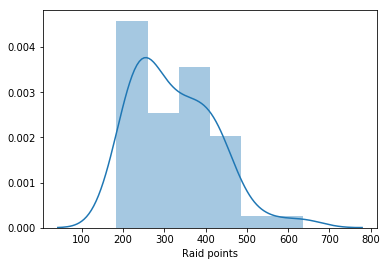

In [693]:
sns.distplot(df_successful['Raid points'])
plt.show()

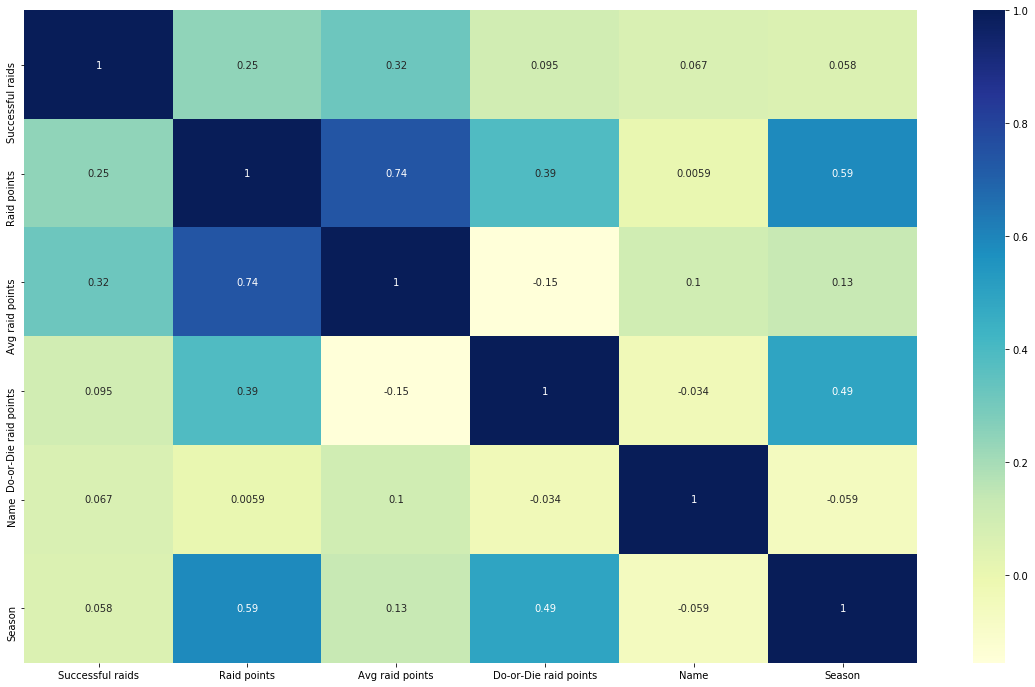

In [694]:
plt.figure(figsize=(20, 12))
sns.heatmap(df_successful.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [695]:
df_train = df_successful[df_successful['Season']!=6]
df_test = df_successful[df_successful['Season']==6]

In [696]:
df_test

,Successful raids,Raid points,Avg raid points,Do-or-Die raid points,Name,Season
10,361.0,437.0,21.85,50.0,2,6
11,340.0,426.0,21.30,53.0,0,6
13,291.0,368.0,19.37,69.0,6,6
14,290.0,358.0,17.90,60.0,7,6
15,290.0,377.0,19.84,71.0,4,6
16,275.0,344.0,17.20,55.0,8,6
19,261.0,337.0,16.85,73.0,5,6


In [697]:
scaler = MinMaxScaler()
df_train[num_var] = scaler.fit_transform(df_train[num_var])
df_test[num_var] = scaler.fit_transform(df_test[num_var])

In [698]:
y_train = df_train.pop('Raid points')
X_train = df_train

In [699]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

In [700]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))
col = X_train.columns[rfe.support_]

In [701]:
X_train_rfe = X_train[col]
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Raid points   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     68.89
Date:                Wed, 02 Oct 2019   Prob (F-statistic):           2.69e-18
Time:                        16:04:47   Log-Likelihood:                 54.946
No. Observations:                  45   AIC:                            -97.89
Df Residuals:                      39   BIC:                            -87.05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.2371      0.038     -6.214      0.000      -0.314      -0.160
Successful raids          0.0247      0.069      0.356      0.724      -0.116       0.165
Avg raid points           0.7219      0.056     12.900      0.000       0.609       0.835
Do-or-Die raid points     0.2214      0.080      2.760      0.009       0.059       0.384
Name                     -0.0035      0.003     -1.050      0.300      -0.010       0.003
Season                    0.0531      0.012      4.332      0.000       0.028       0.078
==============================================================================
Omnibus:                        0.889   Durbin-Watson:                   1.351
Prob(Omnibus):                  0.641   Jarque-Bera (JB):                0.881
Skew:                          -0.309   Prob(JB):                        0.644
Kurtosis:                       2.706   Cond. No.                         55.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [702]:
X_train_new = X_train_rfe.drop(["Name"], axis = 1)
X_train_rfe = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_rfe).fit() 
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Raid points   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     85.61
Date:                Wed, 02 Oct 2019   Prob (F-statistic):           4.64e-19
Time:                        16:04:48   Log-Likelihood:                 54.318
No. Observations:                  45   AIC:                            -98.64
Df Residuals:                      40   BIC:                            -89.60
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.2500      0.036     -6.919      0.000      -0.323      -0.177
Successful raids          0.0202      0.069      0.291      0.773      -0.120       0.160
Avg raid points           0.7137      0.055     12.863      0.000       0.602       0.826
Do-or-Die raid points     0.2232      0.080      2.780      0.008       0.061       0.385
Season                    0.0533      0.012      4.335      0.000       0.028       0.078
==============================================================================
Omnibus:                        1.122   Durbin-Watson:                   1.321
Prob(Omnibus):                  0.571   Jarque-Bera (JB):                1.141
Skew:                          -0.336   Prob(JB):                        0.565
Kurtosis:                       2.605   Cond. No.                         26.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [703]:
X_train_new = X_train_rfe.drop(["Season"], axis = 1)
X_train_rfe = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_rfe).fit() 
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Raid points   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     75.23
Date:                Wed, 02 Oct 2019   Prob (F-statistic):           1.02e-16
Time:                        16:04:48   Log-Likelihood:                 45.651
No. Observations:                  45   AIC:                            -83.30
Df Residuals:                      41   BIC:                            -76.08
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.2347      0.043     -5.449      0.000      -0.322      -0.148
Successful raids         -0.1488      0.069     -2.165      0.036      -0.288      -0.010
Avg raid points           0.8021      0.062     12.983      0.000       0.677       0.927
Do-or-Die raid points     0.5079      0.055      9.177      0.000       0.396       0.620
==============================================================================
Omnibus:                        2.481   Durbin-Watson:                   1.563
Prob(Omnibus):                  0.289   Jarque-Bera (JB):                2.349
Skew:                          -0.507   Prob(JB):                        0.309
Kurtosis:                       2.525   Cond. No.                         7.12
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [704]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train_new = X_train_new.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Successful raids,4.44
1,Avg raid points,3.33
2,Do-or-Die raid points,3.13


In [705]:
X_train_new = sm.add_constant(X_train_new)
y_train_price = lm.predict(X_train_new)

Text(0.5, 0.98, 'Residuals')

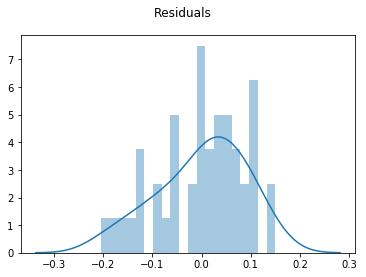

In [706]:
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Residuals') 

In [707]:
y_test = df_test.pop('Raid points')
X_test = df_test

In [708]:
X_train_new.drop(['const'], axis=1,inplace=True)
X_test_new = X_test[X_train_new.columns]

X_test_new = sm.add_constant(X_test_new)

In [709]:
y_pred = lm.predict(X_test_new)

Text(0, 0.5, 'y_pred')

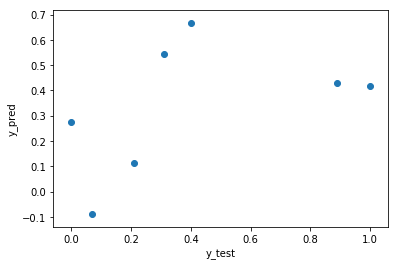

In [710]:
# Plot test v/s predicted values
fig = plt.figure()
plt.scatter(y_test,y_pred)
plt.xlabel('y_test') 
plt.ylabel('y_pred') 

Text(0.5, 0.98, 'Residuals')

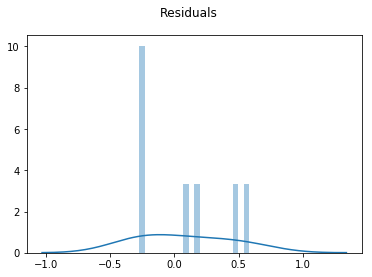

In [711]:
fig = plt.figure()
sns.distplot((y_test - y_pred), bins = 20)
fig.suptitle('Residuals')    

In [712]:
lm = sm.OLS(y_test,X_test_new).fit() 
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Raid points   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     113.0
Date:                Wed, 02 Oct 2019   Prob (F-statistic):            0.00139
Time:                        16:05:00   Log-Likelihood:                 13.775
No. Observations:                   7   AIC:                            -19.55
Df Residuals:                       3   BIC:                            -19.77
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.0542      0.095     -0.568      0.610      -0.358       0.250
Successful raids          0.6930      0.324      2.140      0.122      -0.338       1.724
Avg raid points           0.3834      0.231      1.660      0.196      -0.352       1.118
Do-or-Die raid points     0.0164      0.121      0.136      0.900      -0.368       0.400
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.514
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.407
Skew:                           0.197   Prob(JB):                        0.816
Kurtosis:                       1.886   Cond. No.                         27.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [713]:
'RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_pred))

('RMSE :', 0.33522400965048393)

In [714]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.1377416699559597

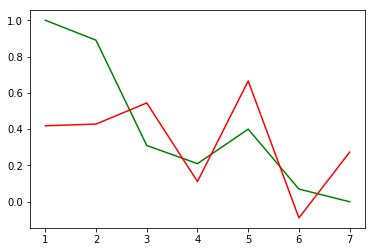

In [715]:
idx = [i for i in range(1,len(y_test)+1,1)]
plt.plot(idx, y_test,c='green')
plt.plot(idx, y_pred,c='red')
plt.show()

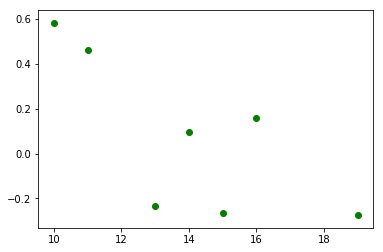

In [716]:
plt.scatter(y_test.index, y_test-y_pred,c='green')
plt.show()

In [717]:
df_test = df_player_raid[df_player_raid['Season'] == 'SEASON 7']
df_test

,Name,Successful raids,Season,Raid points,Avg raid points,Do-or-Die raid points
10,Dabang Delhi K.C.,361.0,SEASON 7,437.0,21.85,50.0
11,Bengal Warriors,340.0,SEASON 7,426.0,21.30,53.0
13,Patna Pirates,291.0,SEASON 7,368.0,19.37,69.0
14,Puneri Paltan,290.0,SEASON 7,358.0,17.90,60.0
15,Haryana Steelers,290.0,SEASON 7,377.0,19.84,71.0
16,Tamil Thalaivas,275.0,SEASON 7,344.0,17.20,55.0
19,Jaipur Pink Panthers,261.0,SEASON 7,337.0,16.85,73.0


In [718]:
df_test['Predicted'] = y_pred
len(y_pred)

7

In [719]:
df_team_raids = df_test[['Name','Predicted']]
df_team_raids.sort_values(by=['Predicted'],ascending=False,inplace=True)
rank = [x for x in range(1,len(df_team_raids)+1)]
df_team_raids['Rank'] = rank
Adf_team_raids

,Name,Predicted,Rank
15,Haryana Steelers,0.665560,1
13,Patna Pirates,0.544505,2
11,Bengal Warriors,0.427911,3
10,Dabang Delhi K.C.,0.418655,4
19,Jaipur Pink Panthers,0.273188,5
14,Puneri Paltan,0.111420,6
16,Tamil Thalaivas,-0.088975,7


As predicted, Haryana Steeleres is the top most team to have successful raids followed by Patna, Bengal, Delhi and Jaipur

Now we will predict team with most super performance

In [720]:
df_player_super= pd.read_csv('Team Super.csv')
df_player_super

,Unnamed: 0,Name,Super raid,Season,Super tackles,All-outs inflicted,All-outs conceded,Super Performance Total,Rank
0,10,Bengal Warriors,15,SEASON 7,0,34,0,49,1.0
1,15,Dabang Delhi K.C.,8,SEASON 7,0,34,0,42,2.0
2,12,Patna Pirates,13,SEASON 7,23,28,23,41,3.0
3,16,Jaipur Pink Panthers,7,SEASON 7,32,19,23,35,4.0
4,11,Haryana Steelers,14,SEASON 7,14,27,21,34,5.0
5,14,Bengaluru Bulls,8,SEASON 7,25,21,24,30,6.5
6,17,U Mumba,7,SEASON 7,18,26,21,30,6.5
7,19,U.P. Yoddha,5,SEASON 7,16,21,22,20,8.0
8,18,Puneri Paltan,6,SEASON 7,25,18,33,16,9.5
9,72,Gujarat Fortunegiants,0,SEASON 7,17,21,22,16,9.5


In [721]:
df_player_super.drop(['Unnamed: 0','Rank'],axis=1,inplace=True)

In [722]:
df_player_super = df_player_super[df_player_super['Season']!='ALL SEASONS']

In [723]:
print(df_player_super.isnull().sum())
len(df_player_super)

Name                       0
Super raid                 0
Season                     0
Super tackles              0
All-outs inflicted         0
All-outs conceded          0
Super Performance Total    0
dtype: int64


68

In [724]:
df_player_super.dropna(inplace=True)

In [725]:
df_player_super.isnull().sum()
len(df_player_super)

68

In [726]:
#Get numerical variables from dataframe
num_var = list(df_player_super._get_numeric_data())
num_var

['Super raid',
 'Super tackles',
 'All-outs inflicted',
 'All-outs conceded',
 'Super Performance Total']

In [727]:
from sklearn import preprocessing
df_successful_categorical = df_player_super.select_dtypes(include=['object'])
df_successful_categorical = df_successful_categorical.astype('category')
df_successful_categorical

,Name,Season
0,Bengal Warriors,SEASON 7
1,Dabang Delhi K.C.,SEASON 7
2,Patna Pirates,SEASON 7
3,Jaipur Pink Panthers,SEASON 7
4,Haryana Steelers,SEASON 7
5,Bengaluru Bulls,SEASON 7
6,U Mumba,SEASON 7
7,U.P. Yoddha,SEASON 7
8,Puneri Paltan,SEASON 7
9,Gujarat Fortunegiants,SEASON 7


In [728]:
len(df_player_super)

68

In [729]:

le = preprocessing.LabelEncoder()
df_successful_categorical1 = df_successful_categorical.astype(str).apply(le.fit_transform)
df_successful = df_player_super.drop(df_successful_categorical1.columns, axis=1)
df_successful = pd.concat([df_successful, df_successful_categorical1], axis=1)
df_successful.head()

,Super raid,Super tackles,All-outs inflicted,All-outs conceded,Super Performance Total,Name,Season
0,15,0,34,0,49,0,6
1,8,0,34,0,42,2,6
2,13,23,28,23,41,6,6
3,7,32,19,23,35,5,6
4,14,14,27,21,34,4,6


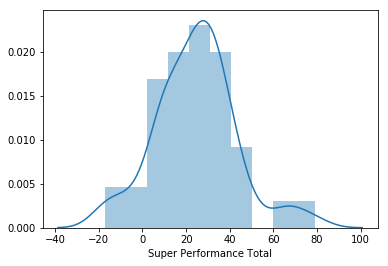

In [730]:
sns.distplot(df_successful['Super Performance Total'])
plt.show()

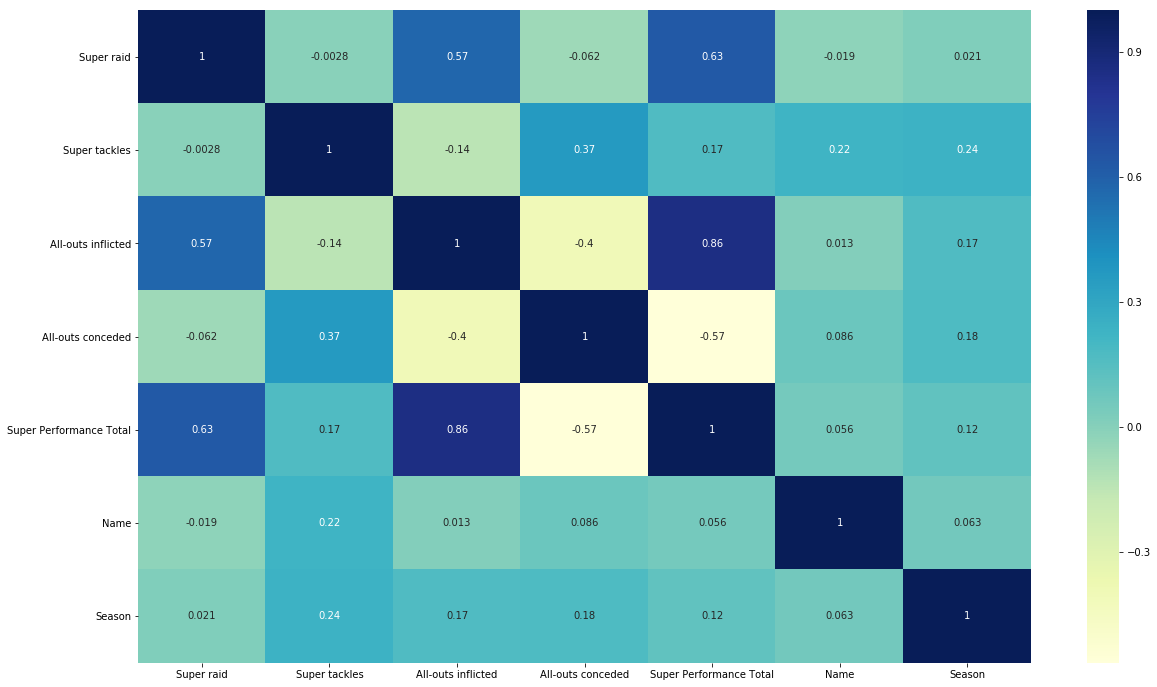

In [731]:
plt.figure(figsize=(20, 12))
sns.heatmap(df_successful.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [732]:
df_train = df_successful[df_successful['Season']!=6]
df_test = df_successful[df_successful['Season']==6]

In [733]:
df_test

,Super raid,Super tackles,All-outs inflicted,All-outs conceded,Super Performance Total,Name,Season
0,15,0,34,0,49,0,6
1,8,0,34,0,42,2,6
2,13,23,28,23,41,6,6
3,7,32,19,23,35,5,6
4,14,14,27,21,34,4,6
5,8,25,21,24,30,1,6
6,7,18,26,21,30,10,6
7,5,16,21,22,20,11,6
8,6,25,18,33,16,7,6
9,0,17,21,22,16,3,6


In [734]:
scaler = MinMaxScaler()
df_train[num_var] = scaler.fit_transform(df_train[num_var])
df_test[num_var] = scaler.fit_transform(df_test[num_var])

In [735]:
y_train = df_train.pop('Super Performance Total')
X_train = df_train

In [736]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

In [737]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))
col = X_train.columns[rfe.support_]

In [738]:
X_train_rfe = X_train[col]
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Super Performance Total   R-squared:                       1.000
Model:                                 OLS   Adj. R-squared:                  1.000
Method:                      Least Squares   F-statistic:                 3.141e+29
Date:                     Wed, 02 Oct 2019   Prob (F-statistic):               0.00
Time:                             16:08:42   Log-Likelihood:                 1854.9
No. Observations:                       56   AIC:                            -3696.
Df Residuals:                           49   BIC:                            -3682.
Df Model:                                6                                         
Covariance Type:                 nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1771   6.09e-16   2.91e+14      0.000       0.177       0.177
Super raid             0.2708   9.39e-16   2.88e+14      0.000       0.271       0.271
Super tackles          0.3542   7.01e-16   5.05e+14      0.000       0.354       0.354
All-outs inflicted     0.5729   1.13e-15   5.09e+14      0.000       0.573       0.573
All-outs conceded     -0.3750   7.29e-16  -5.14e+14      0.000      -0.375      -0.375
Name                -4.51e-17   4.24e-17     -1.065      0.292    -1.3e-16       4e-17
Season              1.249e-16   9.38e-17      1.331      0.189   -6.37e-17    3.13e-16
==============================================================================
Omnibus:                        2.081   Durbin-Watson:                   0.082
Prob(Omnibus):                  0.353   Jarque-Bera (JB):                1.333
Skew:                           0.049   Prob(JB):                        0.513
Kurtosis:                       2.251   Cond. No.                         68.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [739]:
X_train_new = X_train_rfe.drop(["Name"], axis = 1)
X_train_rfe = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_rfe).fit() 
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Super Performance Total   R-squared:                       1.000
Model:                                 OLS   Adj. R-squared:                  1.000
Method:                      Least Squares   F-statistic:                 5.764e+30
Date:                     Wed, 02 Oct 2019   Prob (F-statistic):               0.00
Time:                             16:08:42   Log-Likelihood:                 1930.7
No. Observations:                       56   AIC:                            -3849.
Df Residuals:                           50   BIC:                            -3837.
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1771   1.52e-16   1.16e+15      0.000       0.177       0.177
Super raid             0.2708    2.4e-16   1.13e+15      0.000       0.271       0.271
Super tackles          0.3542   1.75e-16   2.02e+15      0.000       0.354       0.354
All-outs inflicted     0.5729   2.85e-16   2.01e+15      0.000       0.573       0.573
All-outs conceded     -0.3750   1.86e-16  -2.01e+15      0.000      -0.375      -0.375
Season             -2.949e-17    2.4e-17     -1.229      0.225   -7.77e-17    1.87e-17
==============================================================================
Omnibus:                        0.805   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.669   Jarque-Bera (JB):                0.295
Skew:                           0.134   Prob(JB):                        0.863
Kurtosis:                       3.234   Cond. No.                         34.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [740]:
X_train_new = X_train_rfe.drop(["Season"], axis = 1)
X_train_rfe = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_rfe).fit() 
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Super Performance Total   R-squared:                       1.000
Model:                                 OLS   Adj. R-squared:                  1.000
Method:                      Least Squares   F-statistic:                 9.459e+30
Date:                     Wed, 02 Oct 2019   Prob (F-statistic):               0.00
Time:                             16:08:42   Log-Likelihood:                 1937.8
No. Observations:                       56   AIC:                            -3866.
Df Residuals:                           51   BIC:                            -3855.
Df Model:                                4                                         
Covariance Type:                 nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1771   1.32e-16   1.34e+15      0.000       0.177       0.177
Super raid             0.2708   2.07e-16   1.31e+15      0.000       0.271       0.271
Super tackles          0.3542    1.5e-16   2.37e+15      0.000       0.354       0.354
All-outs inflicted     0.5729   2.32e-16   2.47e+15      0.000       0.573       0.573
All-outs conceded     -0.3750   1.52e-16  -2.47e+15      0.000      -0.375      -0.375
==============================================================================
Omnibus:                        2.363   Durbin-Watson:                   0.601
Prob(Omnibus):                  0.307   Jarque-Bera (JB):                1.496
Skew:                          -0.319   Prob(JB):                        0.473
Kurtosis:                       3.485   Cond. No.                         12.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [741]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train_new = X_train_new.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Super raid,7.20
2,All-outs inflicted,6.12
3,All-outs conceded,4.75
1,Super tackles,4.61


In [742]:
X_train_new = X_train_rfe.drop(["Super raid"], axis = 1)
X_train_rfe = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_rfe).fit() 
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Super Performance Total   R-squared:                       0.955
Model:                                 OLS   Adj. R-squared:                  0.952
Method:                      Least Squares   F-statistic:                     365.6
Date:                     Wed, 02 Oct 2019   Prob (F-statistic):           6.39e-35
Time:                             16:08:43   Log-Likelihood:                 98.628
No. Observations:                       56   AIC:                            -189.3
Df Residuals:                           52   BIC:                            -181.2
Df Model:                                3                                         
Covariance Type:                 nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1665      0.024      6.947      0.000       0.118       0.215
Super tackles          0.3664      0.027     13.521      0.000       0.312       0.421
All-outs inflicted     0.7662      0.032     23.667      0.000       0.701       0.831
All-outs conceded     -0.3196      0.026    -12.077      0.000      -0.373      -0.266
==============================================================================
Omnibus:                        4.039   Durbin-Watson:                   2.405
Prob(Omnibus):                  0.133   Jarque-Bera (JB):                4.219
Skew:                          -0.126   Prob(JB):                        0.121
Kurtosis:                       4.321   Cond. No.                         9.10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [743]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train_new = X_train_new.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Super tackles,4.61
2,All-outs conceded,4.26
1,All-outs inflicted,2.75


In [744]:
X_train_new = sm.add_constant(X_train_new)
y_train_price = lm.predict(X_train_new)

Text(0.5, 0.98, 'Residuals')

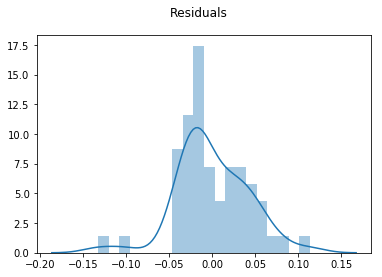

In [745]:
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Residuals') 

In [746]:
y_test = df_test.pop('Super Performance Total')
X_test = df_test

In [747]:
X_train_new.drop(['const'], axis=1,inplace=True)
X_test_new = X_test[X_train_new.columns]

X_test_new = sm.add_constant(X_test_new)

In [748]:
y_pred = lm.predict(X_test_new)

Text(0, 0.5, 'y_pred')

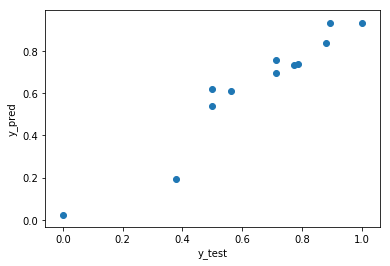

In [749]:
# Plot test v/s predicted values
fig = plt.figure()
plt.scatter(y_test,y_pred)
plt.xlabel('y_test') 
plt.ylabel('y_pred') 

Text(0.5, 0.98, 'Residuals')

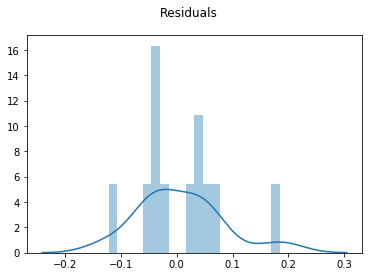

In [750]:
fig = plt.figure()
sns.distplot((y_test - y_pred), bins = 20)
fig.suptitle('Residuals')    

In [751]:
lm = sm.OLS(y_test,X_test_new).fit() 
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Super Performance Total   R-squared:                       0.955
Model:                                 OLS   Adj. R-squared:                  0.938
Method:                      Least Squares   F-statistic:                     56.63
Date:                     Wed, 02 Oct 2019   Prob (F-statistic):           9.88e-06
Time:                             16:08:49   Log-Likelihood:                 17.652
No. Observations:                       12   AIC:                            -27.30
Df Residuals:                            8   BIC:                            -25.36
Df Model:                                3                                         
Covariance Type:                 nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.3609      0.097      3.731      0.006       0.138       0.584
Super tackles          0.5754      0.116      4.969      0.001       0.308       0.842
All-outs inflicted     0.5887      0.085      6.961      0.000       0.394       0.784
All-outs conceded     -0.6317      0.136     -4.661      0.002      -0.944      -0.319
==============================================================================
Omnibus:                        0.024   Durbin-Watson:                   3.037
Prob(Omnibus):                  0.988   Jarque-Bera (JB):                0.229
Skew:                          -0.070   Prob(JB):                        0.892
Kurtosis:                       2.337   Cond. No.                         13.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [752]:
'RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_pred))

('RMSE :', 0.07498304024470656)

In [753]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.918149729766284

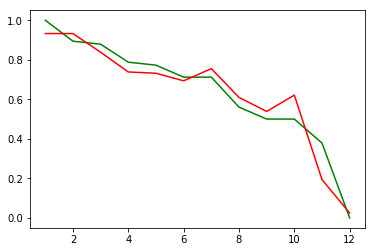

In [754]:
idx = [i for i in range(1,len(y_test)+1,1)]
plt.plot(idx, y_test,c='green')
plt.plot(idx, y_pred,c='red')
plt.show()

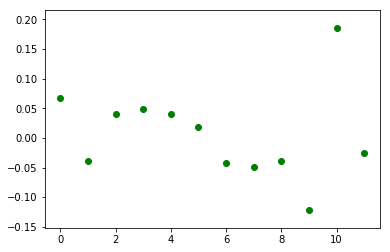

In [755]:
plt.scatter(y_test.index, y_test-y_pred,c='green')
plt.show()

In [756]:
df_test = df_player_super[df_player_super['Season'] == 'SEASON 7']
df_test

,Name,Super raid,Season,Super tackles,All-outs inflicted,All-outs conceded,Super Performance Total
0,Bengal Warriors,15,SEASON 7,0,34,0,49
1,Dabang Delhi K.C.,8,SEASON 7,0,34,0,42
2,Patna Pirates,13,SEASON 7,23,28,23,41
3,Jaipur Pink Panthers,7,SEASON 7,32,19,23,35
4,Haryana Steelers,14,SEASON 7,14,27,21,34
5,Bengaluru Bulls,8,SEASON 7,25,21,24,30
6,U Mumba,7,SEASON 7,18,26,21,30
7,U.P. Yoddha,5,SEASON 7,16,21,22,20
8,Puneri Paltan,6,SEASON 7,25,18,33,16
9,Gujarat Fortunegiants,0,SEASON 7,17,21,22,16


In [757]:
df_test['Predicted'] = y_pred
len(y_pred)

12

In [759]:
df_team_super = df_test[['Name','Predicted']]
df_team_super.sort_values(by=['Predicted'],ascending=False,inplace=True)
rank = [x for x in range(1,len(df_team_super)+1)]
df_team_super['Rank'] = rank
df_team_super

,Name,Predicted,Rank
0,Bengal Warriors,0.932668,1
1,Dabang Delhi K.C.,0.932668,2
2,Patna Pirates,0.838040,3
6,U Mumba,0.755096,4
3,Jaipur Pink Panthers,0.738269,5
4,Haryana Steelers,0.731836,6
5,Bengaluru Bulls,0.693512,7
9,Gujarat Fortunegiants,0.621291,8
7,U.P. Yoddha,0.609842,9
8,Puneri Paltan,0.538748,10


Teams having super performance are Bengal followed by Delhi, Patna, Mumbai and Jaipur

Finally we will predict team with most successful tackles

Team Tackle

In [760]:
df_player_tackle = pd.read_csv('Team Tackle.csv')
df_player_tackle

,Unnamed: 0,Rank_x,Name,Successful tackles,Season,Rank_y,Tackle points,Rank,Matches played,Avg tackle points
0,0,1.0,U Mumba,1216.0,ALL SEASONS,1.0,1317.0,2.0,126.0,10.45
1,1,2.0,Patna Pirates,1176.0,ALL SEASONS,2.0,1303.0,5.0,131.0,9.95
2,2,3.0,Puneri Paltan,1159.0,ALL SEASONS,3.0,1276.0,3.0,126.0,10.13
3,3,4.0,Bengaluru Bulls,1086.0,ALL SEASONS,6.0,1172.0,9.0,125.0,9.38
4,4,5.0,Telugu Titans,1067.0,ALL SEASONS,5.0,1176.0,6.0,122.0,9.64
5,5,6.0,Jaipur Pink Panthers,1055.0,ALL SEASONS,4.0,1179.0,8.0,124.0,9.51
6,6,7.0,Bengal Warriors,1025.0,ALL SEASONS,7.0,1118.0,10.0,125.0,8.94
7,7,8.0,Dabang Delhi K.C.,998.0,ALL SEASONS,8.0,1087.0,NaN,NaN,NaN
8,8,9.0,Gujarat Fortunegiants,687.0,ALL SEASONS,9.0,731.0,1.0,69.0,10.59
9,9,10.0,U.P. Yoddha,600.0,ALL SEASONS,10.0,658.0,4.0,66.0,9.97


In [761]:
df_player_tackle.drop(['Unnamed: 0','Rank','Rank_x','Rank_y'],axis=1,inplace=True)

In [762]:
df_player_tackle = df_player_tackle[df_player_tackle['Season']!='ALL SEASONS']

In [763]:
print(df_player_tackle.isnull().sum())
len(df_player_tackle)

Name                  0
Successful tackles    2
Season                0
Tackle points         2
Matches played        2
Avg tackle points     2
dtype: int64


64

In [764]:
df_player_tackle.dropna(inplace=True)

In [765]:
df_player_tackle.isnull().sum()
len(df_player_tackle)

60

In [766]:
#Get numerical variables from dataframe
num_var = list(df_player_tackle._get_numeric_data())
num_var

['Successful tackles', 'Tackle points', 'Matches played', 'Avg tackle points']

In [767]:
from sklearn import preprocessing
df_successful_categorical = df_player_tackle.select_dtypes(include=['object'])
df_successful_categorical = df_successful_categorical.astype('category')
df_successful_categorical

,Name,Season
10,Puneri Paltan,SEASON 7
11,Jaipur Pink Panthers,SEASON 7
12,Gujarat Fortunegiants,SEASON 7
13,Bengal Warriors,SEASON 7
15,Haryana Steelers,SEASON 7
16,U.P. Yoddha,SEASON 7
17,Bengaluru Bulls,SEASON 7
18,U Mumba,SEASON 7
19,Patna Pirates,SEASON 7
20,U Mumba,SEASON 6


In [768]:
len(df_player_tackle)

60

In [769]:

le = preprocessing.LabelEncoder()
df_successful_categorical1 = df_successful_categorical.astype(str).apply(le.fit_transform)
df_successful = df_player_tackle.drop(df_successful_categorical1.columns, axis=1)
df_successful = pd.concat([df_successful, df_successful_categorical1], axis=1)
df_successful.head()

,Successful tackles,Tackle points,Matches played,Avg tackle points,Name,Season
10,207.0,232.0,20.0,11.60,7,6
11,189.0,219.0,20.0,10.95,5,6
12,187.0,203.0,20.0,10.15,3,6
13,182.0,192.0,20.0,9.60,0,6
15,181.0,195.0,19.0,10.26,4,6


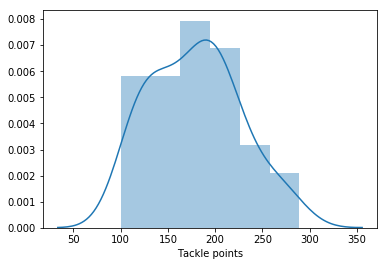

In [770]:
sns.distplot(df_successful['Tackle points'])
plt.show()

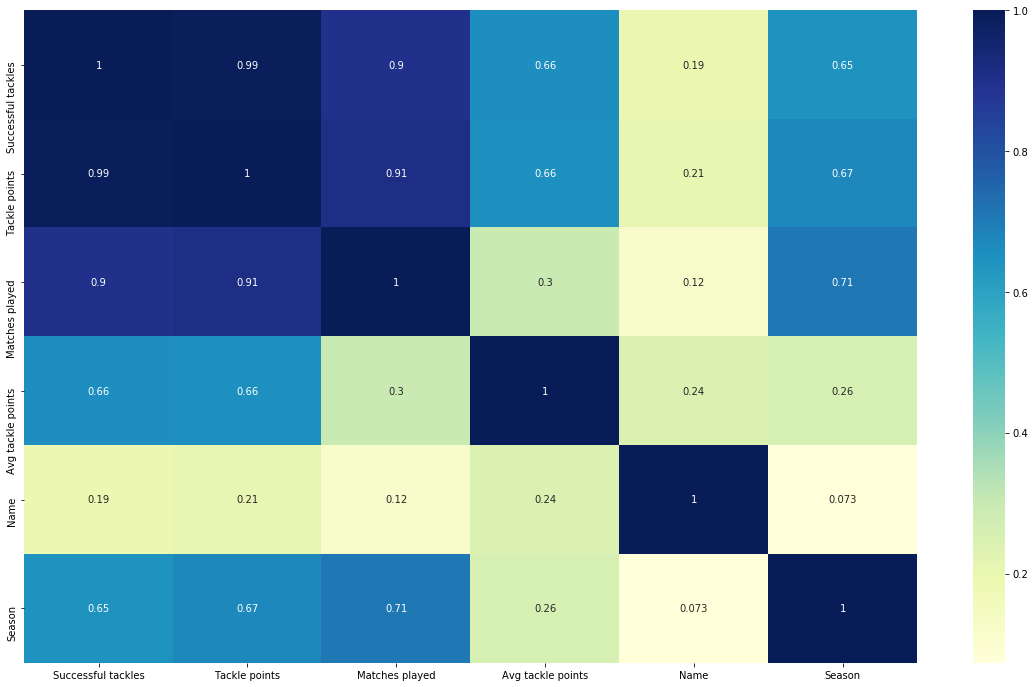

In [771]:
plt.figure(figsize=(20, 12))
sns.heatmap(df_successful.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [772]:
df_successful.drop(['Successful tackles'],axis=1,inplace=True)

In [773]:
df_train = df_successful[df_successful['Season']!=6]
df_test = df_successful[df_successful['Season']==6]

In [774]:
num_var.remove('Successful tackles')
df_test

,Tackle points,Matches played,Avg tackle points,Name,Season
10,232.0,20.0,11.60,7,6
11,219.0,20.0,10.95,5,6
12,203.0,20.0,10.15,3,6
13,192.0,20.0,9.60,0,6
15,195.0,19.0,10.26,4,6
16,192.0,18.0,10.67,11,6
17,191.0,19.0,10.05,1,6
18,183.0,19.0,9.63,10,6
19,191.0,19.0,10.05,6,6


In [775]:
scaler = MinMaxScaler()
df_train[num_var] = scaler.fit_transform(df_train[num_var])
df_test[num_var] = scaler.fit_transform(df_test[num_var])

In [776]:
y_train = df_train.pop('Tackle points')
X_train = df_train

In [777]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

In [778]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))
col = X_train.columns[rfe.support_]

In [779]:
X_train_rfe = X_train[col]
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Tackle points   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     1418.
Date:                Wed, 02 Oct 2019   Prob (F-statistic):           1.60e-47
Time:                        16:11:27   Log-Likelihood:                 118.68
No. Observations:                  51   AIC:                            -227.4
Df Residuals:                      46   BIC:                            -217.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0467      0.010     -4.544      0.000      -0.067      -0.026
Matches played        0.5978      0.018     33.543      0.000       0.562       0.634
Avg tackle points     0.5011      0.017     28.872      0.000       0.466       0.536
Name                  0.0008      0.001      0.772      0.444      -0.001       0.003
Season                0.0033      0.003      0.960      0.342      -0.004       0.010
==============================================================================
Omnibus:                        7.019   Durbin-Watson:                   0.801
Prob(Omnibus):                  0.030   Jarque-Bera (JB):                6.000
Skew:                           0.714   Prob(JB):                       0.0498
Kurtosis:                       3.887   Cond. No.                         41.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [780]:
X_train_new = X_train_rfe.drop(["Name"], axis = 1)
X_train_rfe = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_rfe).fit() 
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Tackle points   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     1907.
Date:                Wed, 02 Oct 2019   Prob (F-statistic):           4.51e-49
Time:                        16:11:27   Log-Likelihood:                 118.35
No. Observations:                  51   AIC:                            -228.7
Df Residuals:                      47   BIC:                            -221.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0441      0.010     -4.566      0.000      -0.063      -0.025
Matches played        0.5983      0.018     33.749      0.000       0.563       0.634
Avg tackle points     0.5041      0.017     29.913      0.000       0.470       0.538
Season                0.0034      0.003      0.972      0.336      -0.004       0.010
==============================================================================
Omnibus:                        7.720   Durbin-Watson:                   0.859
Prob(Omnibus):                  0.021   Jarque-Bera (JB):                6.901
Skew:                           0.728   Prob(JB):                       0.0317
Kurtosis:                       4.061   Cond. No.                         19.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [781]:
X_train_new = X_train_rfe.drop(["Season"], axis = 1)
X_train_rfe = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_rfe).fit() 
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Tackle points   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     2863.
Date:                Wed, 02 Oct 2019   Prob (F-statistic):           1.19e-50
Time:                        16:11:27   Log-Likelihood:                 117.85
No. Observations:                  51   AIC:                            -229.7
Df Residuals:                      48   BIC:                            -223.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0392      0.008     -4.755      0.000      -0.056      -0.023
Matches played        0.6122      0.011     58.176      0.000       0.591       0.633
Avg tackle points     0.5023      0.017     30.004      0.000       0.469       0.536
==============================================================================
Omnibus:                        8.110   Durbin-Watson:                   0.890
Prob(Omnibus):                  0.017   Jarque-Bera (JB):                7.694
Skew:                           0.701   Prob(JB):                       0.0213
Kurtosis:                       4.287   Cond. No.                         6.13
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [782]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train_new = X_train_new.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Matches played,2.08
1,Avg tackle points,2.08


In [783]:
X_train_new = sm.add_constant(X_train_new)
y_train_price = lm.predict(X_train_new)

Text(0.5, 0.98, 'Residuals')

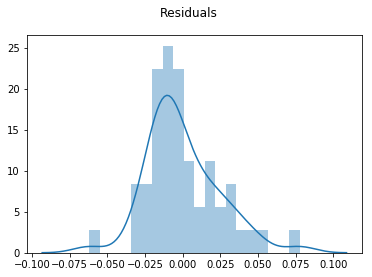

In [784]:
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Residuals') 

In [785]:
y_test = df_test.pop('Tackle points')
X_test = df_test

In [786]:
X_train_new.drop(['const'], axis=1,inplace=True)
X_test_new = X_test[X_train_new.columns]

X_test_new = sm.add_constant(X_test_new)

In [787]:
y_pred = lm.predict(X_test_new)

Text(0, 0.5, 'y_pred')

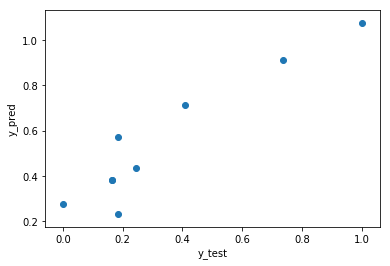

In [788]:
# Plot test v/s predicted values
fig = plt.figure()
plt.scatter(y_test,y_pred)
plt.xlabel('y_test') 
plt.ylabel('y_pred') 

Text(0.5, 0.98, 'Residuals')

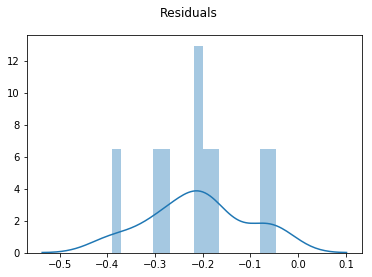

In [789]:
fig = plt.figure()
sns.distplot((y_test - y_pred), bins = 20)
fig.suptitle('Residuals')    

In [790]:
lm = sm.OLS(y_test,X_test_new).fit() 
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Tackle points   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     6970.
Date:                Wed, 02 Oct 2019   Prob (F-statistic):           7.96e-11
Time:                        16:11:29   Log-Likelihood:                 32.825
No. Observations:                   9   AIC:                            -59.65
Df Residuals:                       6   BIC:                            -59.06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.2361      0.006    -38.282      0.000      -0.251      -0.221
Matches played        0.4286      0.008     54.627      0.000       0.409       0.448
Avg tackle points     0.8033      0.009     93.405      0.000       0.782       0.824
==============================================================================
Omnibus:                        0.725   Durbin-Watson:                   1.578
Prob(Omnibus):                  0.696   Jarque-Bera (JB):                0.601
Skew:                          -0.299   Prob(JB):                        0.740
Kurtosis:                       1.884   Cond. No.                         4.66
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [791]:
'RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_pred))

('RMSE :', 0.23262800227788066)

In [792]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.41459047403174965

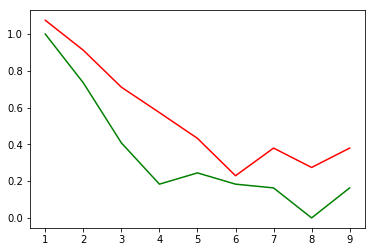

In [793]:
idx = [i for i in range(1,len(y_test)+1,1)]
plt.plot(idx, y_test,c='green')
plt.plot(idx, y_pred,c='red')
plt.show()

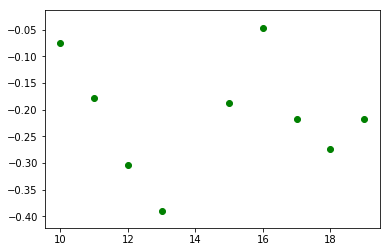

In [794]:
plt.scatter(y_test.index, y_test-y_pred,c='green')
plt.show()

In [795]:
df_test = df_player_tackle[df_player_tackle['Season'] == 'SEASON 7']
df_test

,Name,Successful tackles,Season,Tackle points,Matches played,Avg tackle points
10,Puneri Paltan,207.0,SEASON 7,232.0,20.0,11.60
11,Jaipur Pink Panthers,189.0,SEASON 7,219.0,20.0,10.95
12,Gujarat Fortunegiants,187.0,SEASON 7,203.0,20.0,10.15
13,Bengal Warriors,182.0,SEASON 7,192.0,20.0,9.60
15,Haryana Steelers,181.0,SEASON 7,195.0,19.0,10.26
16,U.P. Yoddha,177.0,SEASON 7,192.0,18.0,10.67
17,Bengaluru Bulls,168.0,SEASON 7,191.0,19.0,10.05
18,U Mumba,168.0,SEASON 7,183.0,19.0,9.63
19,Patna Pirates,168.0,SEASON 7,191.0,19.0,10.05


In [796]:
df_test['Predicted'] = y_pred
len(y_pred)

9

In [798]:
df_team_tackle = df_test[['Name','Predicted']]
df_team_tackle.sort_values(by=['Predicted'],ascending=False,inplace=True)
rank = [x for x in range(1,len(df_team_tackle)+1)]
df_team_tackle['Rank'] = rank
df_team_tackle

,Name,Predicted,Rank
10,Puneri Paltan,1.075282,1
11,Jaipur Pink Panthers,0.912043,2
12,Gujarat Fortunegiants,0.711133,3
13,Bengal Warriors,0.573007,4
15,Haryana Steelers,0.432658,5
17,Bengaluru Bulls,0.379919,6
19,Patna Pirates,0.379919,7
18,U Mumba,0.274441,8
16,U.P. Yoddha,0.229524,9


Teams with most tackles are Puneri paltan followed by Jaipur, Gujarat, Bengal and Haryana respectively.

With this, we are done with our analysis


df_player_raids
df_player_successfultackle
df_team_data
df_team_super
df_team_raids
df_team_tackle